In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
cu = pd.read_csv('EDA_customer.csv')
tr = pd.read_csv('EDA_transaction_last1.csv')
# pr = pd.read_csv('Final_product.csv')

In [3]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   created_at           1254585 non-null  object 
 1   customer_id          1254585 non-null  int64  
 2   session_id           1254585 non-null  object 
 3   payment_method       1254585 non-null  object 
 4   payment_status       1254585 non-null  object 
 5   promo_amount         1254585 non-null  int64  
 6   promo_code           1254585 non-null  object 
 7   shipment_fee         1254585 non-null  int64  
 8   shipment_date_limit  1254585 non-null  object 
 9   total_amount         1254585 non-null  int64  
 10  product_id           1254585 non-null  int64  
 11  quantity             1254585 non-null  int64  
 12  item_price           1254585 non-null  int64  
 13  year                 1254585 non-null  int64  
 14  shipment_time        1254585 non-null  object 
 15

In [4]:
tr['created_at'] = pd.to_datetime(tr['created_at'])
tr['order_date'] = tr['created_at'].dt.date
tr['order_time'] = tr['created_at'].dt.time
tr['order_time'] = tr['order_time'].apply(lambda x: x.replace(microsecond=0))
tr['order_date'] = pd.to_datetime(tr['order_date'])

In [5]:
tr['price'] = tr['item_price'] * tr['quantity']
tr_col=['created_at','order_date','order_time','customer_id', 'session_id', 'payment_method', 'payment_status', 'promo_amount', 'promo_code', 'shipment_fee', 'total_amount', 'product_id', 'quantity', 'item_price','price','product_id']
df = tr[tr_col]

In [6]:
cu_join = cu[['customer_id','birthdate','first_join_date']]
df= pd.merge(df, cu_join, on='customer_id', how='inner')

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.strftime('%Y-%m')
month_list = np.sort(df['order_month'].unique().tolist())
df['order_year'] = df['order_date'].dt.year

In [8]:
df['birthdate'] = pd.to_datetime(df['birthdate'])
df['first_join_date'] = pd.to_datetime(df['first_join_date'])
df['join_year'] = df['first_join_date'].dt.year

In [9]:
df = df.sort_values(['customer_id', 'order_date'])
df['order_num'] = df.groupby('customer_id')['order_date'].rank(method='dense').astype(int)

df.head()


,created_at,order_date,order_time,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,quantity,item_price,price,product_id,birthdate,first_join_date,order_month,order_year,join_year,order_num
352123,2018-08-25 18:54:03.844494+00:00,2018-08-25,18:54:03,3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,...,5,166934,834670,56019,1986-07-12,2018-08-25,2018-08,2018,2018,1
352124,2018-09-22 18:42:52.844494+00:00,2018-09-22,18:42:52,3,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,Not Promoted,10000,...,1,153784,153784,30235,1986-07-12,2018-08-25,2018-09,2018,2018,2
352125,2018-10-20 19:07:54.844494+00:00,2018-10-20,19:07:54,3,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,...,1,123760,123760,7808,1986-07-12,2018-08-25,2018-10,2018,2018,3
352126,2018-11-17 19:09:49.844494+00:00,2018-11-17,19:09:49,3,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,...,1,251317,251317,48968,1986-07-12,2018-08-25,2018-11,2018,2018,4
352127,2018-12-15 19:33:50.844494+00:00,2018-12-15,19:33:50,3,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,...,1,173882,173882,59272,1986-07-12,2018-08-25,2018-12,2018,2018,5


NameError: name 'df' is not defined

In [10]:
df = df.sort_values(by=['customer_id', 'order_date'])
df['date_diff'] = df.groupby('customer_id')['order_date'].diff().dt.days
df['date_diff'] = df.groupby(['customer_id', 'order_date'])['date_diff'].transform('first')

In [11]:
def categorize_customer(row):
    time_difference = row['order_date'] - row['first_join_date']
    if time_difference.days <= 60:
        return '신규고객'
    else:
        return '기존고객'

df['customer_category'] = df.apply(categorize_customer, axis=1)
df

,created_at,order_date,order_time,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,price,product_id,birthdate,first_join_date,order_month,order_year,join_year,order_num,date_diff,customer_category
352123,2018-08-25 18:54:03.844494+00:00,2018-08-25,18:54:03,3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,...,834670,56019,1986-07-12,2018-08-25,2018-08,2018,2018,1,NaN,신규고객
352124,2018-09-22 18:42:52.844494+00:00,2018-09-22,18:42:52,3,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,Not Promoted,10000,...,153784,30235,1986-07-12,2018-08-25,2018-09,2018,2018,2,28.0,신규고객
352125,2018-10-20 19:07:54.844494+00:00,2018-10-20,19:07:54,3,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,...,123760,7808,1986-07-12,2018-08-25,2018-10,2018,2018,3,28.0,신규고객
352126,2018-11-17 19:09:49.844494+00:00,2018-11-17,19:09:49,3,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,...,251317,48968,1986-07-12,2018-08-25,2018-11,2018,2018,4,28.0,기존고객
352127,2018-12-15 19:33:50.844494+00:00,2018-12-15,19:33:50,3,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,...,173882,59272,1986-07-12,2018-08-25,2018-12,2018,2018,5,28.0,기존고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336586,2022-01-25 00:54:09.703960+00:00,2022-01-25,00:54:09,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,...,358650,18523,2014-05-21,2018-07-01,2022-01,2022,2018,8,187.0,기존고객
336587,2022-01-25 00:54:09.703960+00:00,2022-01-25,00:54:09,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,...,135965,44211,2014-05-21,2018-07-01,2022-01,2022,2018,8,187.0,기존고객
336588,2022-01-25 00:54:09.703960+00:00,2022-01-25,00:54:09,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,...,248506,16555,2014-05-21,2018-07-01,2022-01,2022,2018,8,187.0,기존고객
336589,2022-01-25 00:54:09.703960+00:00,2022-01-25,00:54:09,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,...,170392,20236,2014-05-21,2018-07-01,2022-01,2022,2018,8,187.0,기존고객


In [12]:
df=df[df['payment_status']=='Success']

In [13]:
max_order_nums = df.groupby('customer_id')['order_num'].max()

one_time_customers = max_order_nums[max_order_nums == 1].index
multiple_times_customers = max_order_nums[max_order_nums > 1].index

one_data = df[df['customer_id'].isin(one_time_customers)]
multiple_data = df[df['customer_id'].isin(multiple_times_customers)]

In [14]:
df['customer_type'] = np.where(df['customer_id'].isin(one_time_customers), '일회성고객', '다회성고객')

In [15]:
print(df['customer_id'].nunique())
print(len(one_time_customers))
print(len(multiple_times_customers))

50242
10134
40108


In [16]:
df.head(3)

,created_at,order_date,order_time,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,product_id,birthdate,first_join_date,order_month,order_year,join_year,order_num,date_diff,customer_category,customer_type
352123,2018-08-25 18:54:03.844494+00:00,2018-08-25,18:54:03,3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,...,56019,1986-07-12,2018-08-25,2018-08,2018,2018,1,NaN,신규고객,다회성고객
352124,2018-09-22 18:42:52.844494+00:00,2018-09-22,18:42:52,3,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,Not Promoted,10000,...,30235,1986-07-12,2018-08-25,2018-09,2018,2018,2,28.0,신규고객,다회성고객
352125,2018-10-20 19:07:54.844494+00:00,2018-10-20,19:07:54,3,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,...,7808,1986-07-12,2018-08-25,2018-10,2018,2018,3,28.0,신규고객,다회성고객


In [17]:
df

,created_at,order_date,order_time,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,product_id,birthdate,first_join_date,order_month,order_year,join_year,order_num,date_diff,customer_category,customer_type
352123,2018-08-25 18:54:03.844494+00:00,2018-08-25,18:54:03,3,f03b6825-1e6e-4916-bf71-f94ecbcbaee5,Credit Card,Success,8073,WEEKENDMANTAP,0,...,56019,1986-07-12,2018-08-25,2018-08,2018,2018,1,NaN,신규고객,다회성고객
352124,2018-09-22 18:42:52.844494+00:00,2018-09-22,18:42:52,3,36673b2f-940a-42b5-994d-1cce4796b55f,Credit Card,Success,0,Not Promoted,10000,...,30235,1986-07-12,2018-08-25,2018-09,2018,2018,2,28.0,신규고객,다회성고객
352125,2018-10-20 19:07:54.844494+00:00,2018-10-20,19:07:54,3,93e1d3c4-bed1-4ef4-b79f-e24a79e905b7,Credit Card,Success,8828,WEEKENDSERU,10000,...,7808,1986-07-12,2018-08-25,2018-10,2018,2018,3,28.0,신규고객,다회성고객
352126,2018-11-17 19:09:49.844494+00:00,2018-11-17,19:09:49,3,8356370c-267e-4530-a2d3-1830e4be3f2b,Credit Card,Success,3415,WEEKENDSERU,0,...,48968,1986-07-12,2018-08-25,2018-11,2018,2018,4,28.0,기존고객,다회성고객
352127,2018-12-15 19:33:50.844494+00:00,2018-12-15,19:33:50,3,ef7f4829-e7d1-4513-861b-1fbbc6e41bbf,Credit Card,Success,2645,LIBURDONG,10000,...,59272,1986-07-12,2018-08-25,2018-12,2018,2018,5,28.0,기존고객,다회성고객
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336586,2022-01-25 00:54:09.703960+00:00,2022-01-25,00:54:09,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,...,18523,2014-05-21,2018-07-01,2022-01,2022,2018,8,187.0,기존고객,다회성고객
336587,2022-01-25 00:54:09.703960+00:00,2022-01-25,00:54:09,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,...,44211,2014-05-21,2018-07-01,2022-01,2022,2018,8,187.0,기존고객,다회성고객
336588,2022-01-25 00:54:09.703960+00:00,2022-01-25,00:54:09,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,...,16555,2014-05-21,2018-07-01,2022-01,2022,2018,8,187.0,기존고객,다회성고객
336589,2022-01-25 00:54:09.703960+00:00,2022-01-25,00:54:09,99998,4fc4d81b-4b29-4aef-bd1f-263c373950d1,Credit Card,Success,1954,BUYMORE,10000,...,20236,2014-05-21,2018-07-01,2022-01,2022,2018,8,187.0,기존고객,다회성고객


In [18]:
# new=df[df['customer_category']=='신규고객']


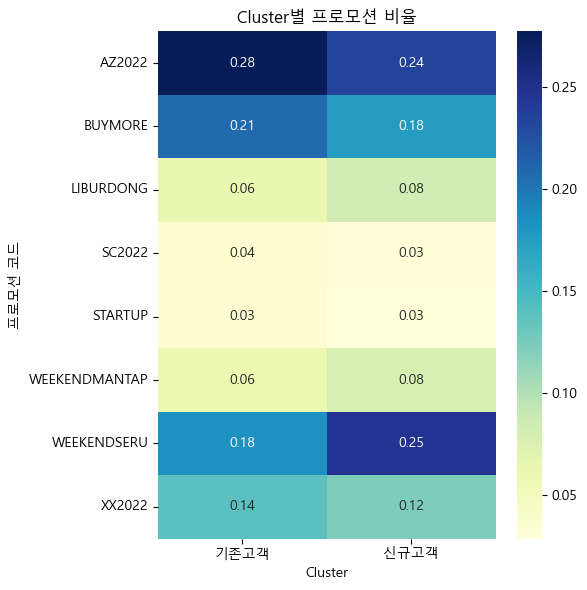

In [19]:
promo = df.query('promo_code != "Not Promoted"')
# 클러스터별 프로모션 코드 빈도 계산
promo_counts_by_cluster = promo.groupby(['customer_category', 'promo_code'])['order_date'].count().reset_index()

# 클러스터별 총 거래 횟수
total_counts_by_cluster = promo_counts_by_cluster.groupby('customer_category')['order_date'].sum()

# 비율 계산
promo_counts_by_cluster['cluster_ratio'] = promo_counts_by_cluster.groupby('customer_category')['order_date'].apply(lambda x: x / total_counts_by_cluster[x.name]).values

# 피벗 테이블로 데이터 변환
pivot_data = promo_counts_by_cluster.pivot(index='promo_code', columns='customer_category', values='cluster_ratio')

# 히트맵
plt.figure(figsize=(6, 6))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.heatmap(data=pivot_data, annot=True, fmt=".2f", cmap='YlGnBu', xticklabels=True, yticklabels=True)
plt.xlabel('Cluster')
plt.ylabel('프로모션 코드')
plt.title('Cluster별 프로모션 비율')

plt.tight_layout()
plt.show()

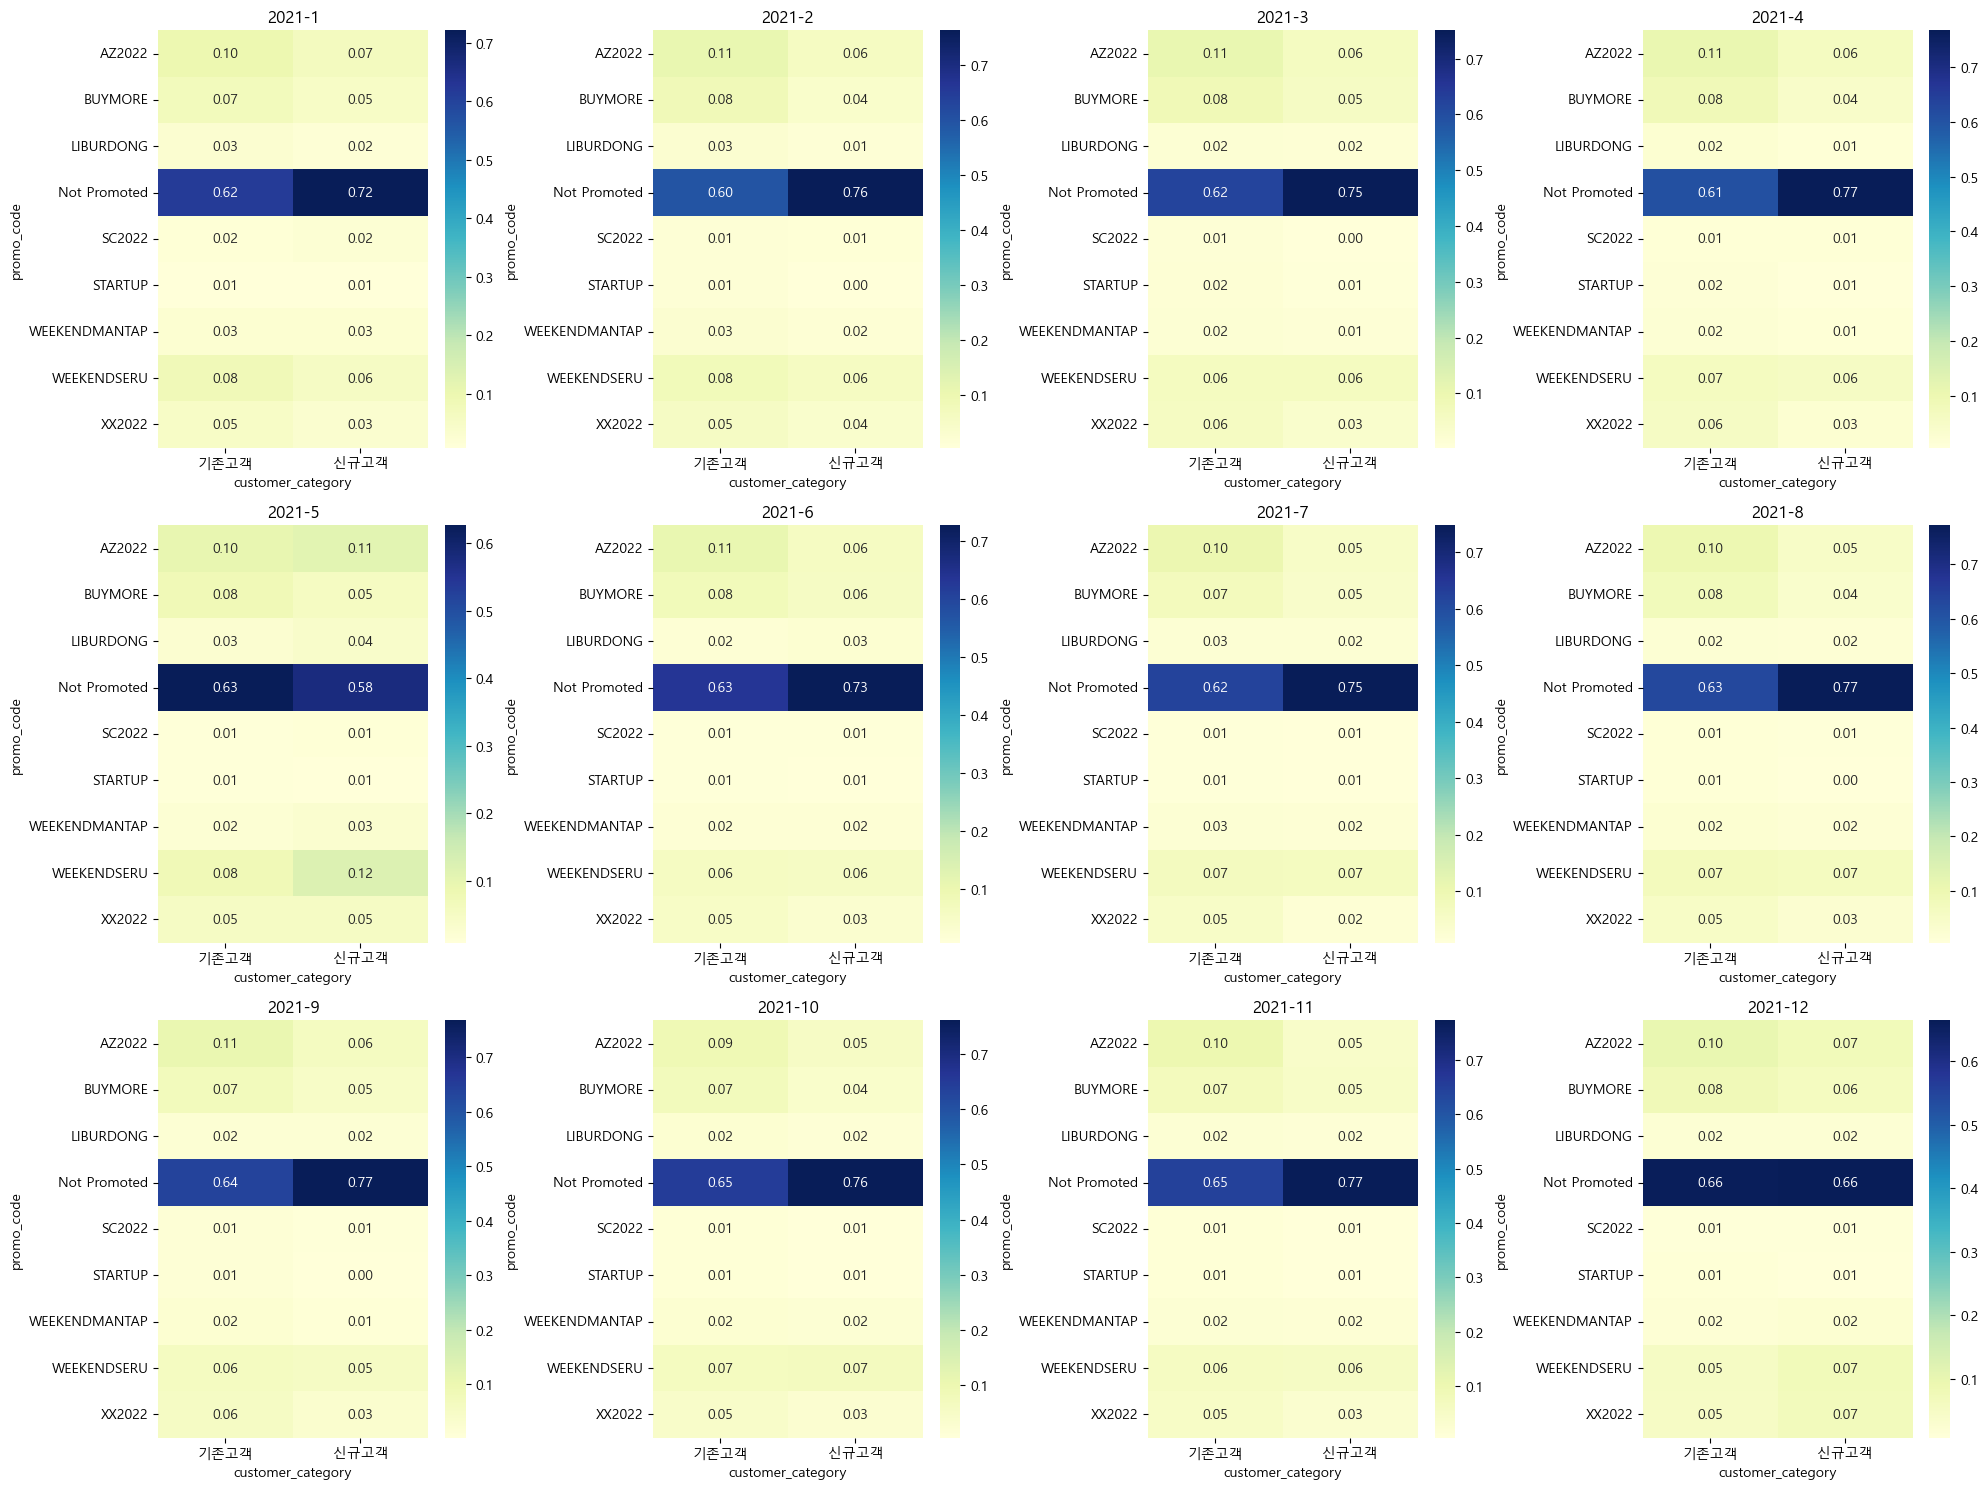

In [20]:
# 2021년 데이터만 추출
promo_2021 = df.query('order_date.dt.year == 2021')
 
# 월별로 데이터 그리기
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 3x4 subplot 생성
months = range(1, 13)

for month, ax in zip(months, axes.ravel()):
    monthly_data = promo_2021[promo_2021['order_date'].dt.month == month]
    promo_counts_by_month = monthly_data.groupby(['customer_category', 'promo_code'])['order_date'].count().reset_index()
    total_counts_by_month = promo_counts_by_month.groupby('customer_category')['order_date'].sum()
    
    # 비율 계산
    promo_counts_by_month['cluster_ratio'] = promo_counts_by_month.groupby('customer_category')['order_date'].apply(lambda x: x / total_counts_by_month[x.name]).values

    # 피벗 테이블로 데이터 변환
    pivot_data_monthly = promo_counts_by_month.pivot(index='promo_code', columns='customer_category', values='cluster_ratio')

    # 히트맵
    sns.heatmap(data=pivot_data_monthly, annot=True, fmt=".2f", cmap='YlGnBu', ax=ax)
    ax.set_title(f'2021-{month}')

plt.tight_layout()
plt.show()

In [21]:
# df.to_csv("rfm.csv", index=False, encoding="utf-8-sig", mode="w")

In [22]:
print(df['order_num'].median())
print(df['order_num'].mean())

19.0
35.16236995591302


In [23]:
purchase_per_person_day=df.groupby(['customer_id','order_date'])['price'].sum().mean()
purchase_per_person_day

544376.7439363695

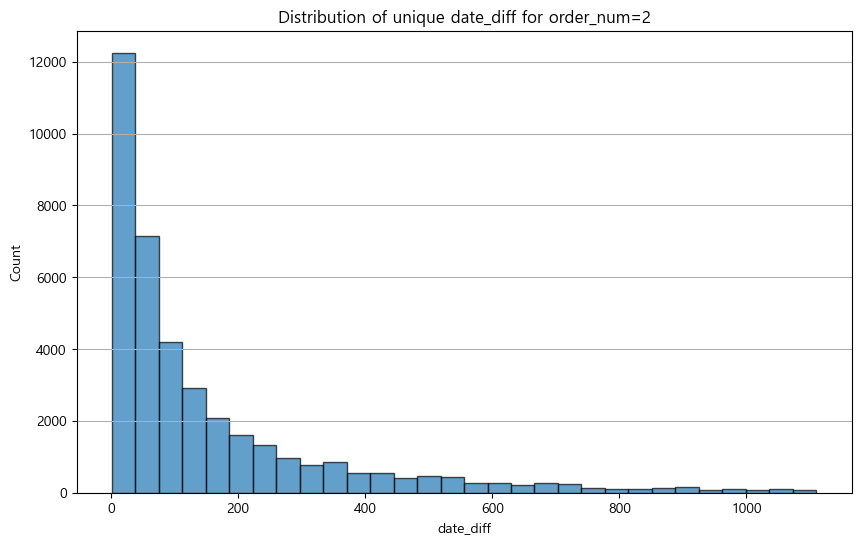

In [24]:
filtered_df = df[df['order_num'] == 2]

# session_id 별로 중복을 제거하여 고유한 date_diff 값을 가져옵니다.
unique_date_diffs = filtered_df.drop_duplicates(subset='session_id')['date_diff']

# date_diff 컬럼의 히스토그램을 그림
plt.figure(figsize=(10, 6))
plt.hist(unique_date_diffs, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of unique date_diff for order_num=2')
plt.xlabel('date_diff')
plt.ylabel('Count')
plt.grid(True, axis='y')
plt.show()

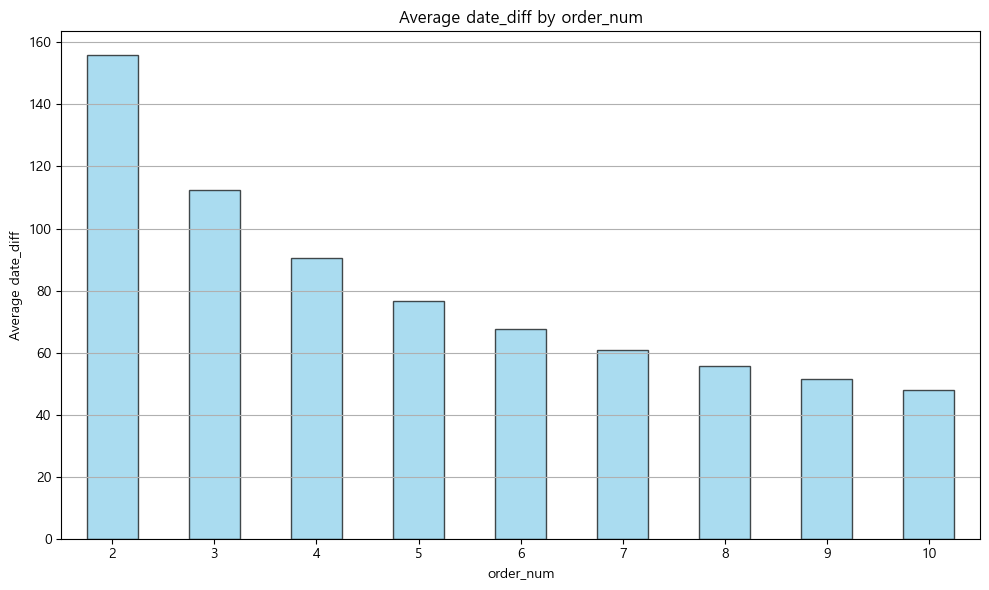

In [25]:
# session_id별로 중복을 제거하여 고유한 order_num과 date_diff 값을 가져옵니다.
unique_order_num_date_diffs = df.drop_duplicates(subset=['session_id']).groupby('order_num')['date_diff'].mean()

# order_num 값이 2~10 사이인 데이터만 가져옵니다.
order_nums_to_plot = range(2, 11)
avg_date_diffs = unique_order_num_date_diffs[order_nums_to_plot]

# 막대그래프로 결과를 표시합니다.
plt.figure(figsize=(10, 6))
avg_date_diffs.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Average date_diff by order_num')
plt.xlabel('order_num')
plt.ylabel('Average date_diff')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


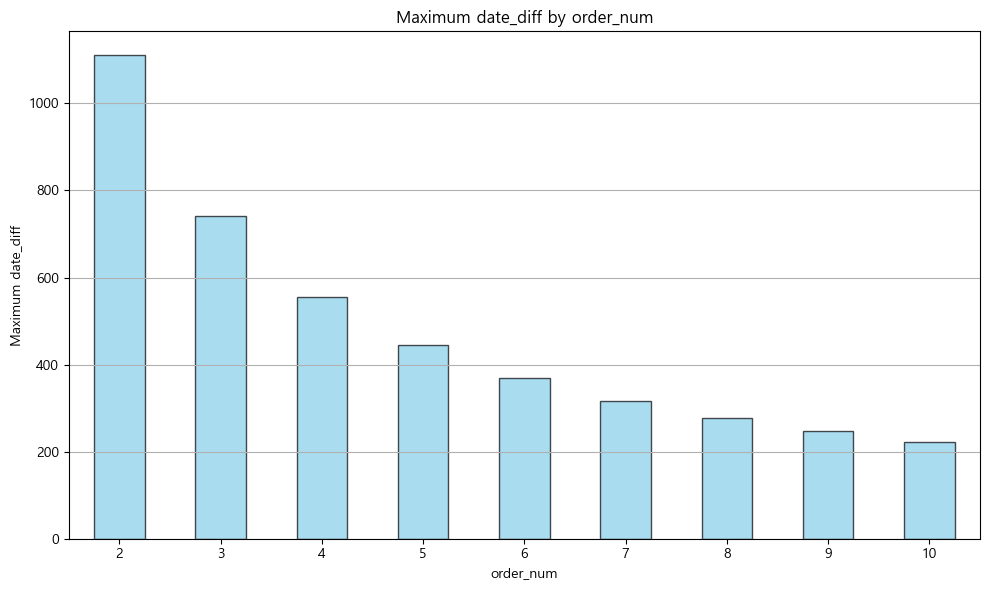

In [26]:
# session_id별로 중복을 제거하여 고유한 order_num과 date_diff 값을 가져옵니다.
unique_order_num_date_diffsmax = df.drop_duplicates(subset=['session_id']).groupby('order_num')['date_diff'].max()

# order_num 값이 2~10 사이인 데이터만 가져옵니다.
order_nums_to_plot = range(2, 11)
max_date_diffs = unique_order_num_date_diffsmax[order_nums_to_plot]

# 막대그래프로 결과를 표시합니다.
plt.figure(figsize=(10, 6))
max_date_diffs.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Maximum date_diff by order_num')
plt.ylabel('Maximum date_diff')
plt.xlabel('order_num')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

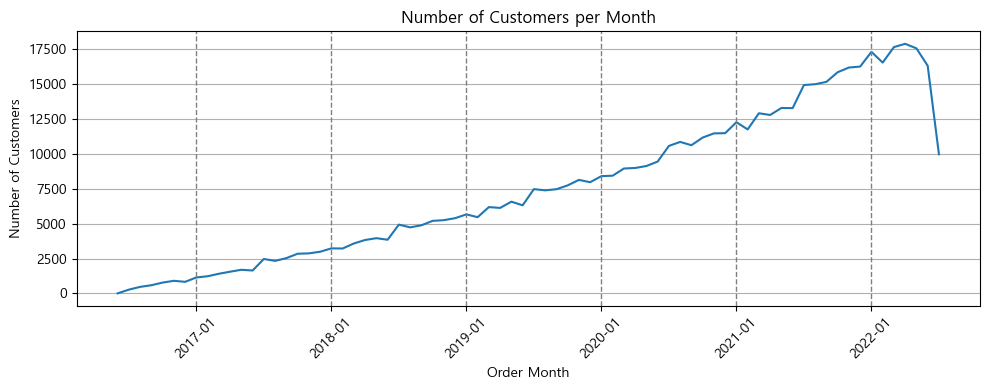

In [27]:
customers_per_month = df.groupby('order_month')['customer_id'].nunique()

plt.figure(figsize=(10, 4))
ax = customers_per_month.plot()

january_ticks = []
for idx, month in enumerate(customers_per_month.index):
    if month.endswith('-01'):
        ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)
        january_ticks.append(idx)

ax.set_xticks(january_ticks)
ax.set_xticklabels([customers_per_month.index[i] for i in january_ticks], rotation=45)
plt.title('Number of Customers per Month')
plt.xlabel('Order Month')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

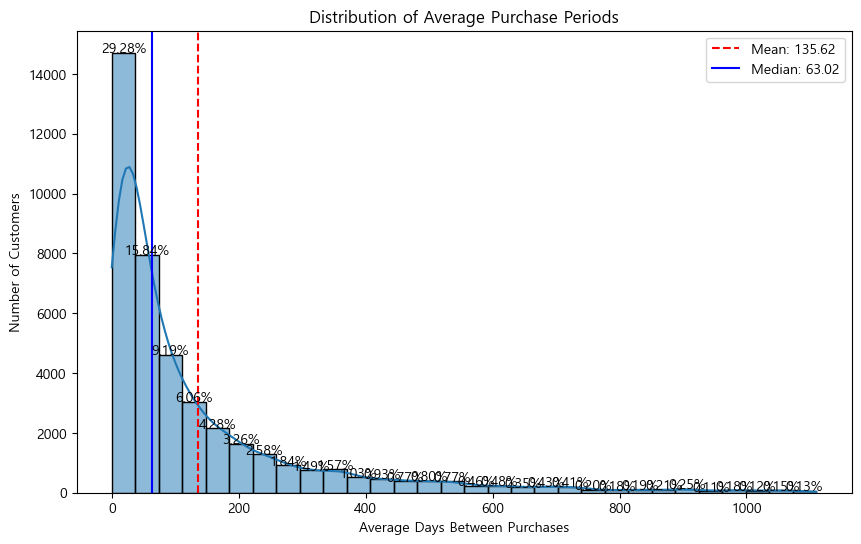

In [28]:
avg_periods = df.groupby('customer_id')['date_diff'].mean()

plt.figure(figsize=(10, 6))
ax = sns.histplot(avg_periods, bins=30, kde=True)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(100 * height / len(avg_periods)),
            ha="center")

mean_val = avg_periods.mean()
median_val = avg_periods.median()
plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='b', linestyle='-', label=f'Median: {median_val:.2f}')

plt.title("Distribution of Average Purchase Periods")
plt.xlabel("Average Days Between Purchases")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

In [79]:
bins = list(range(0, 131, 10)) + [np.inf]
labels = [f"{i+1}-{i+10} days" for i in bins[:-2]] + [f"{bins[-2]+1}+ days"]

# Updating df with new bins and labels
df['date_diff_bin'] = pd.cut(df.get('date_diff', pd.Series([0]*len(df))), bins=bins, labels=labels, right=False)

sum_quantity_price_per_bin = df.groupby(['date_diff_bin'])['price'].sum().reset_index()
average_of_sums_per_bin = sum_quantity_price_per_bin.groupby('date_diff_bin')['price'].mean()


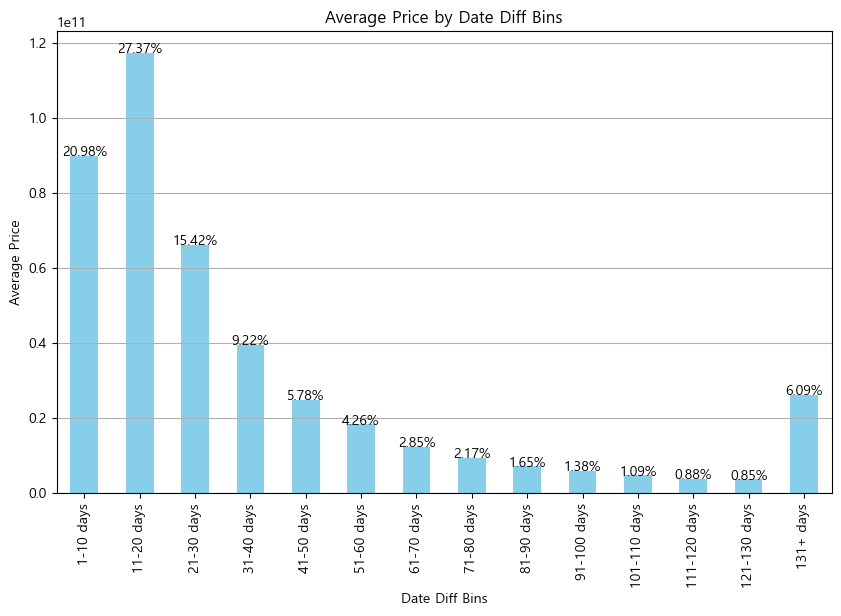

In [81]:
total_avg_qty_price = average_of_sums_per_bin.sum()

plt.figure(figsize=(10, 6))
ax = average_of_sums_per_bin.plot(kind='bar', color='skyblue')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.2f}%'.format(100 * height / total_avg_qty_price),
            ha="center")

plt.title('Average Price by Date Diff Bins')
plt.xlabel('Date Diff Bins')
plt.ylabel('Average Price')
plt.grid(True, axis='y')
plt.show()


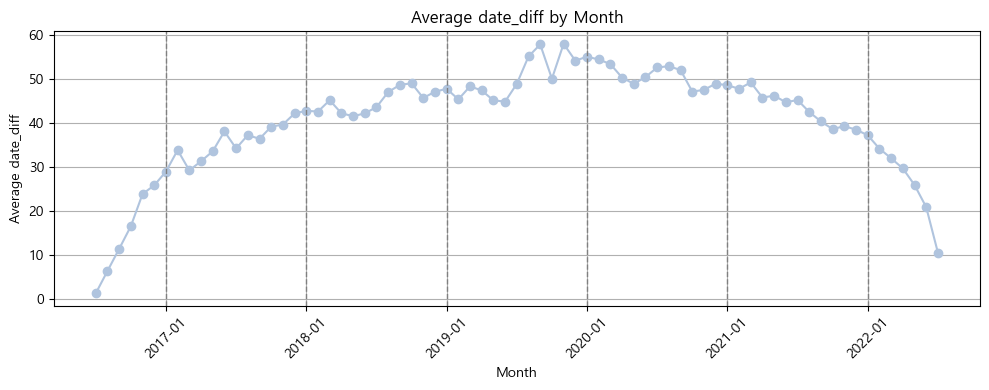

In [32]:
avg_date_diff_by_month = df.groupby('order_month')['date_diff'].mean()

plt.figure(figsize=(10, 4))
ax=avg_date_diff_by_month.plot(marker='o', color='lightsteelblue')

january_ticks = []
for idx, month in enumerate(month_list):
    if month.endswith('-01'):
        ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)
        january_ticks.append(idx)

ax.set_xticks(january_ticks)
ax.set_xticklabels([month_list[i] for i in january_ticks], rotation=45)

plt.title('Average date_diff by Month')
plt.xlabel('Month')
plt.ylabel('Average date_diff')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

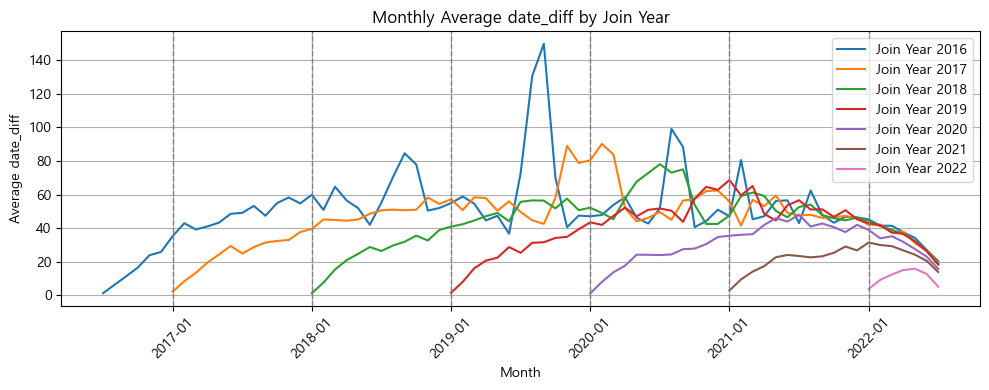

In [83]:
avg_date_diff_by_month_and_year = df.groupby(['order_month', 'join_year'])['date_diff'].mean().unstack()

plt.figure(figsize=(10, 4))

for year in avg_date_diff_by_month_and_year.columns:
    ax = avg_date_diff_by_month_and_year[year].plot(label=f'Join Year {year}')

january_ticks = []
for idx, month in enumerate(month_list):
    if month.endswith('-01'):
        ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)
        january_ticks.append(idx)

ax.set_xticks(january_ticks)
ax.set_xticklabels([month_list[i] for i in january_ticks], rotation=45)
plt.title('Monthly Average date_diff by Join Year')
plt.xlabel('Month')
plt.ylabel('Average date_diff')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

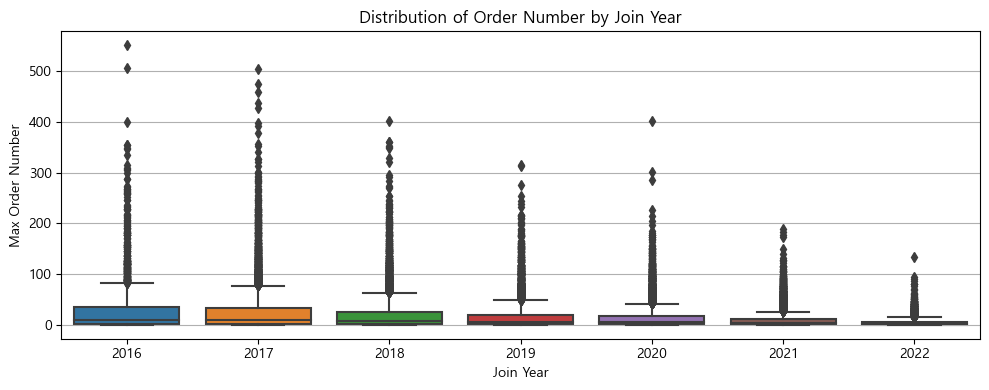

In [34]:
total_max_order_num = df.groupby(['join_year', 'customer_id'])['order_num'].max().reset_index()

plt.figure(figsize=(10, 4))
sns.boxplot(data=total_max_order_num, x='join_year', y='order_num')

plt.title('Distribution of Order Number by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Max Order Number')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

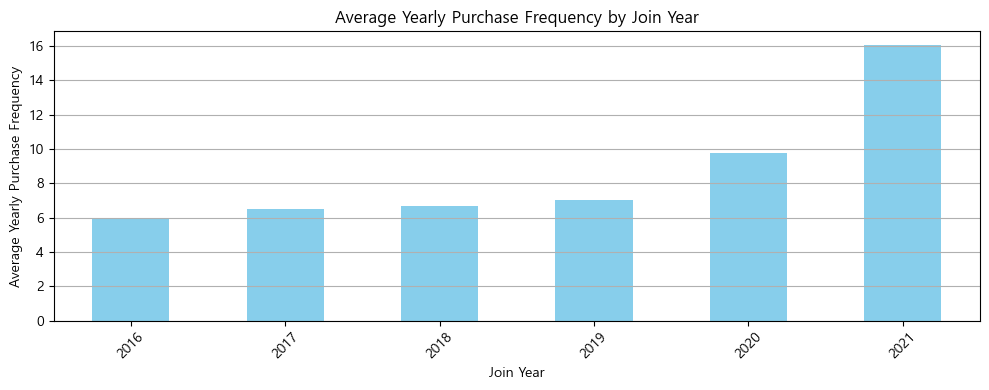

In [35]:
# # 가입 연도별 연간 평균 구매 빈도 계산
customer_stats = df.groupby('customer_id').agg({
    'join_year': 'first',
    'order_date': ['min', 'max', 'nunique']
}).reset_index()

customer_stats.columns = ['customer_id', 'join_year', 'first_order', 'last_order', 'purchase_count']
customer_stats['duration_years'] = (customer_stats['last_order'] - customer_stats['first_order']).dt.days / 365

customer_stats['avg_purchase_per_year'] = customer_stats['purchase_count'] / customer_stats['duration_years']
filtered_stats = customer_stats[customer_stats['duration_years'] >= 1]
avg_purchase_by_year = filtered_stats.groupby('join_year')['avg_purchase_per_year'].mean()

plt.figure(figsize=(10, 4))
avg_purchase_by_year.plot(kind='bar', color='skyblue')
plt.title('Average Yearly Purchase Frequency by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Average Yearly Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

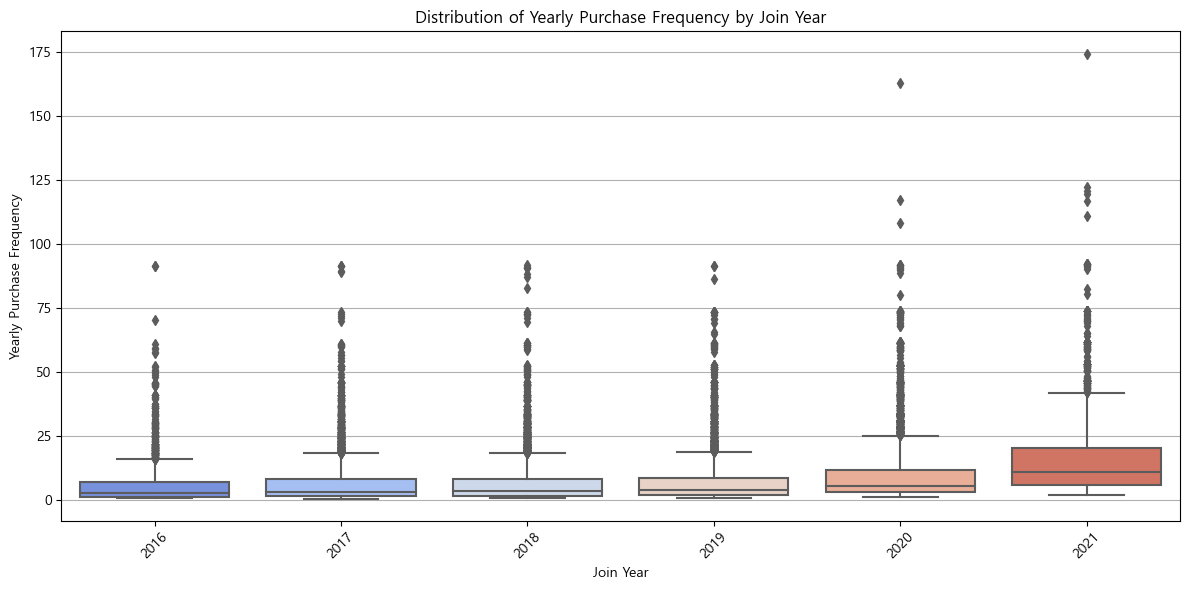

In [85]:
# Calculations from provided snippet
customer_stats = df.groupby('customer_id').agg({
    'join_year': 'first',
    'order_date': ['min', 'max', 'nunique']
}).reset_index()

customer_stats.columns = ['customer_id', 'join_year', 'first_order', 'last_order', 'purchase_count']
customer_stats['duration_years'] = (customer_stats['last_order'] - customer_stats['first_order']).dt.days / 365

customer_stats['avg_purchase_per_year'] = customer_stats['purchase_count'] / customer_stats['duration_years']
filtered_stats = customer_stats[customer_stats['duration_years'] >= 1]

# Plotting boxplot for avg_purchase_per_year by join_year
plt.figure(figsize=(12, 6))
sns.boxplot(x='join_year', y='avg_purchase_per_year', data=filtered_stats, palette="coolwarm")
plt.title('Distribution of Yearly Purchase Frequency by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Yearly Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

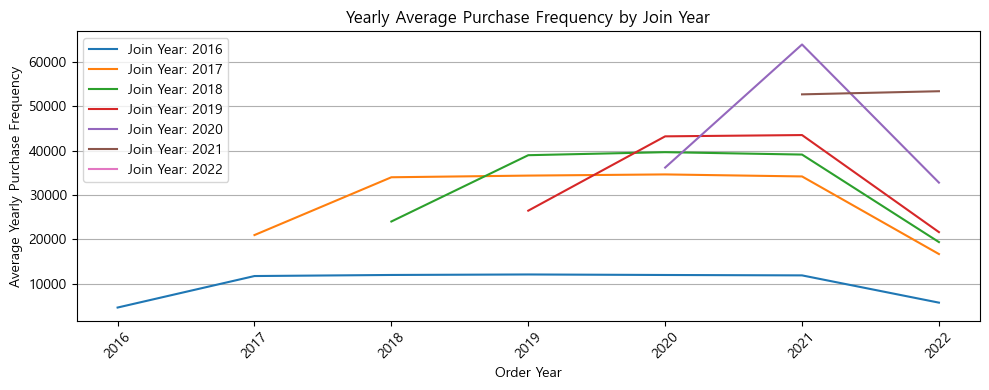

In [36]:
yearly_purchase = df.groupby(['order_year', 'join_year'])['session_id'].nunique().reset_index()
yearly_purchase.columns = ['order_year', 'join_year', 'avg_purchase_count']

plt.figure(figsize=(10, 4))

for join_year in yearly_purchase['join_year'].unique():
    subset = yearly_purchase[yearly_purchase['join_year'] == join_year]
    plt.plot(subset['order_year'], subset['avg_purchase_count'], label=f'Join Year: {join_year}')

plt.title('Yearly Average Purchase Frequency by Join Year')
plt.xlabel('Order Year')
plt.ylabel('Average Yearly Purchase Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


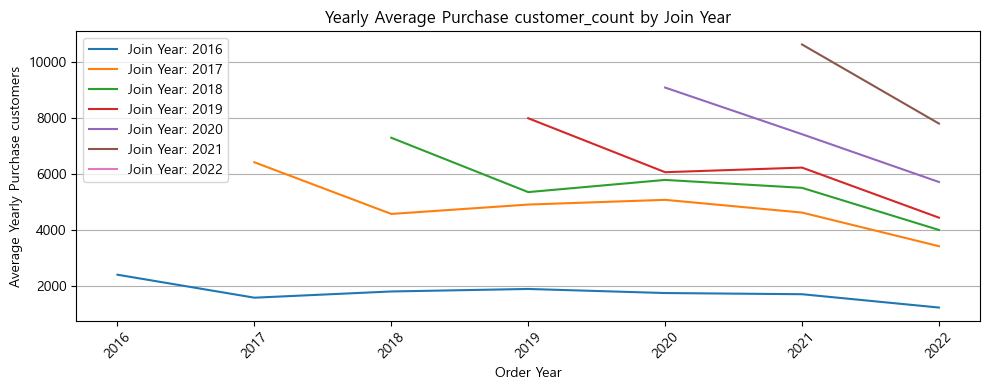

In [37]:

yearly_purchase_customer = df.groupby(['order_year', 'join_year'])['customer_id'].nunique().reset_index()
yearly_purchase_customer.columns = ['order_year', 'join_year', 'avg_purchase_count']

plt.figure(figsize=(10, 4))

for join_year in yearly_purchase_customer['join_year'].unique():
    subset = yearly_purchase_customer[yearly_purchase_customer['join_year'] == join_year]
    plt.plot(subset['order_year'], subset['avg_purchase_count'], label=f'Join Year: {join_year}')

plt.title('Yearly Average Purchase customer_count by Join Year')
plt.xlabel('Order Year')
plt.ylabel('Average Yearly Purchase customers')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
average_datediff = df.groupby('customer_id')['date_diff'].mean().mean()
average_ordernum = df.groupby('customer_id')['order_num'].max().mean()

print('평균 구매 주기:', average_datediff)
print('평균 구매 횟수:',average_ordernum)

평균 구매 주기: 135.6171282829714
평균 구매 횟수: 16.88234942876478


In [40]:
average_price = df['total_amount'].mean()

first_order_date = df.groupby('customer_id')['order_date'].min()
last_order_date = df.groupby('customer_id')['order_date'].max()
average_duration = (last_order_date - first_order_date).mean().days

LTV = average_price * average_ordernum * average_duration
LTV2 = average_price * average_ordernum * average_datediff
print('LTV(duration) : ',LTV)
print('(datediff) * (ordernum) * (average_price) : ', LTV2)

LTV(duration) :  13504139647.92631
(datediff) * (ordernum) * (average_price) :  2709160708.556187


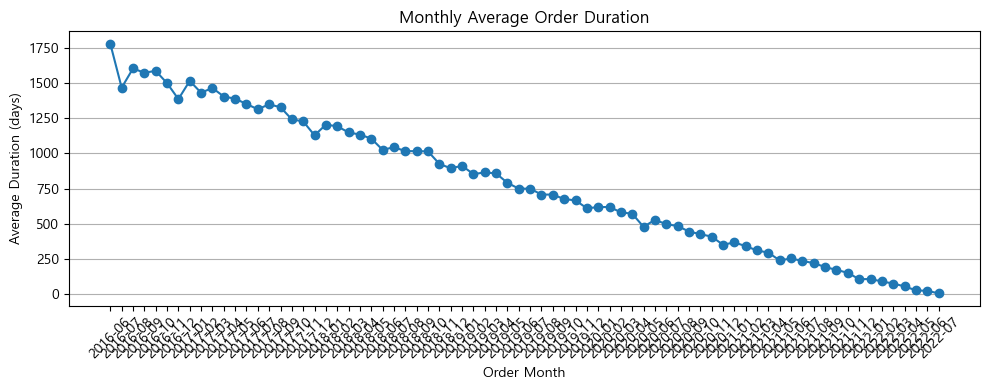

In [41]:
# 각 월별로 첫 주문을 한 고객들의 평균 주문 기간=> 이걸보고싶은게 아니었는데......
df_duration = df.groupby('customer_id').agg(
    first_order_date=('order_date', 'min'),
    last_order_date=('order_date', 'max')
).reset_index()

df_duration['first_order_month'] = df_duration['first_order_date'].dt.to_period('M')

df_monthly_avg_duration = df_duration.groupby('first_order_month').apply(
    lambda x: (x['last_order_date'] - x['first_order_date']).mean()
).reset_index()

df_monthly_avg_duration.columns = ['order_month', 'average_duration']
df_monthly_avg_duration['average_duration'] = df_monthly_avg_duration['average_duration'].dt.days

plt.figure(figsize=(10, 4))
plt.plot(df_monthly_avg_duration['order_month'].astype(str), df_monthly_avg_duration['average_duration'], marker='o')
plt.title('Monthly Average Order Duration')
plt.xlabel('Order Month')
plt.ylabel('Average Duration (days)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

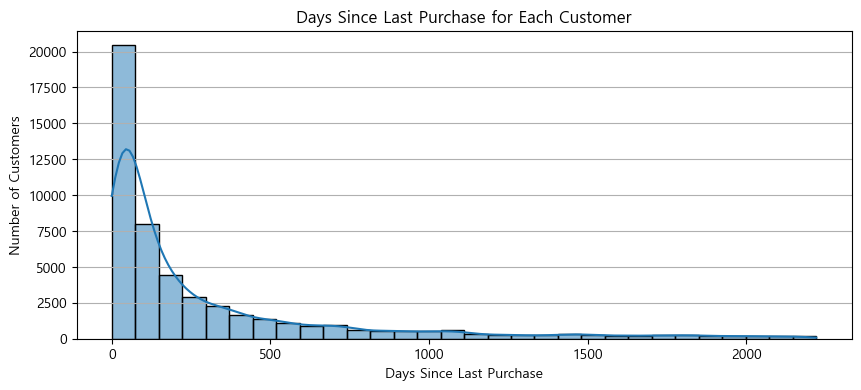

In [42]:
# 마지막 구매로부터 경과된 일 수
last_purchase_date = df.groupby('customer_id')['order_date'].max()
latest_date_in_data = df['order_date'].max()

days_since_last_purchase = (latest_date_in_data - last_purchase_date).dt.days

plt.figure(figsize=(10, 4))
sns.histplot(days_since_last_purchase, bins=30, kde=True)
plt.title("Days Since Last Purchase for Each Customer")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Number of Customers")
plt.grid(True, axis='y')
plt.show()

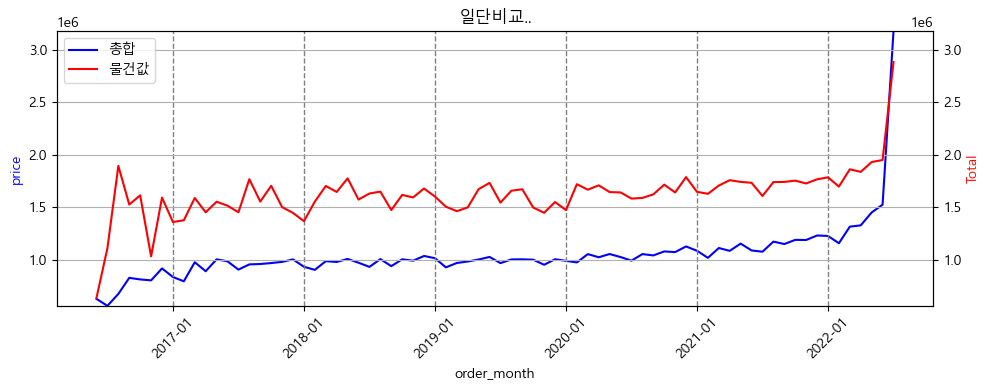

In [43]:
#####정리해서 다시 만들어야함!!! 

monthly_avg_price = df.groupby('order_month')['total_amount'].mean()
price_total_customer = df.groupby('order_month')['price'].sum()
avg_price_per_month = price_total_customer / customers_per_month

# monthly_max_ordernum = df.groupby(['order_month', 'customer_id'])['order_num'].max().reset_index() # 월별횟수는 당연올라가지..
# monthly_avg_ordernum = monthly_max_ordernum.groupby('order_month')['order_num'].mean()
monthly_session_per_customer = df.groupby(['order_month', 'customer_id'])['session_id'].nunique().reset_index()
customers_per_month = monthly_session_per_customer.groupby('order_month')['customer_id'].nunique()
avg_session_per_month = monthly_session_per_customer.groupby('order_month')['session_id'].sum() / customers_per_month

# monthly_datediff = df.groupby(['order_month', 'customer_id'])['date_diff'].mean().reset_index()
# monthly_avg_datediff = monthly_datediff.groupby('order_month')['date_diff'].mean() #간격곱하는것도 말이안되지..

monthly_LTV = avg_price_per_month * avg_session_per_month 
monthly_total = monthly_avg_price * avg_session_per_month 

ymin = min(monthly_LTV.min(), monthly_total.min())
ymax = max(monthly_LTV.max(), monthly_total.max())

plt.figure(figsize=(10, 4))
plt.rcParams['font.family'] = 'Malgun Gothic'

ax = monthly_LTV.plot(label='총합', color='b')
ax2 = ax.twinx()  
monthly_total.plot(ax=ax2, label='물건값', color='r')

january_ticks = []
for idx, month in enumerate(month_list):
    if month.endswith('-01'):
        ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)
        january_ticks.append(idx)

ax.set_xticks(january_ticks)
ax.set_xticklabels([month_list[i] for i in january_ticks], rotation=45)

plt.title('일단비교..')
plt.xlabel('Order Month')

ax.set_ylim(ymin, ymax)
ax2.set_ylim(ymin, ymax)
ax.set_ylabel('price', color='b')
ax2.set_ylabel('Total', color='r')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<Figure size 600x300 with 0 Axes>

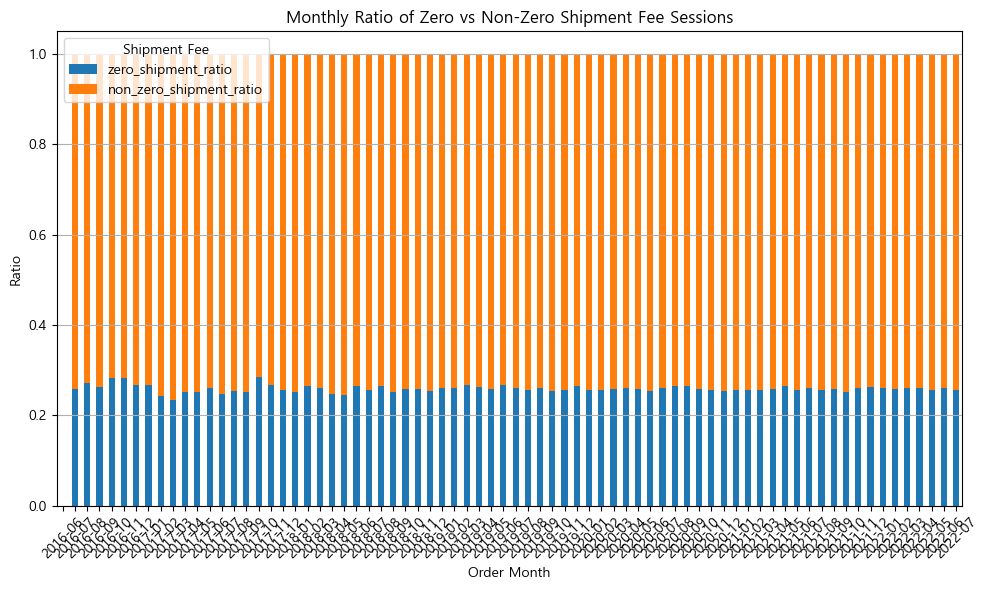

In [44]:
# 각 session_id에 대해 shipment_fee가 0인지 아닌지 판별
df['is_zero_shipment'] = df['shipment_fee'] == 0

# order_month 및 is_zero_shipment로 그룹화하여 세션 수 계산
session_count = df.groupby(['order_month', 'is_zero_shipment'])['session_id'].nunique().unstack()

# 각 월별로 비율을 계산
session_count['zero_shipment_ratio'] = session_count[True] / (session_count[True] + session_count[False])
session_count['non_zero_shipment_ratio'] = session_count[False] / (session_count[True] + session_count[False])

plt.figure(figsize=(6, 3))
session_count[['zero_shipment_ratio', 'non_zero_shipment_ratio']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Monthly Ratio of Zero vs Non-Zero Shipment Fee Sessions')
plt.xlabel('Order Month')
plt.ylabel('Ratio')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Shipment Fee', loc='upper left')
plt.show()

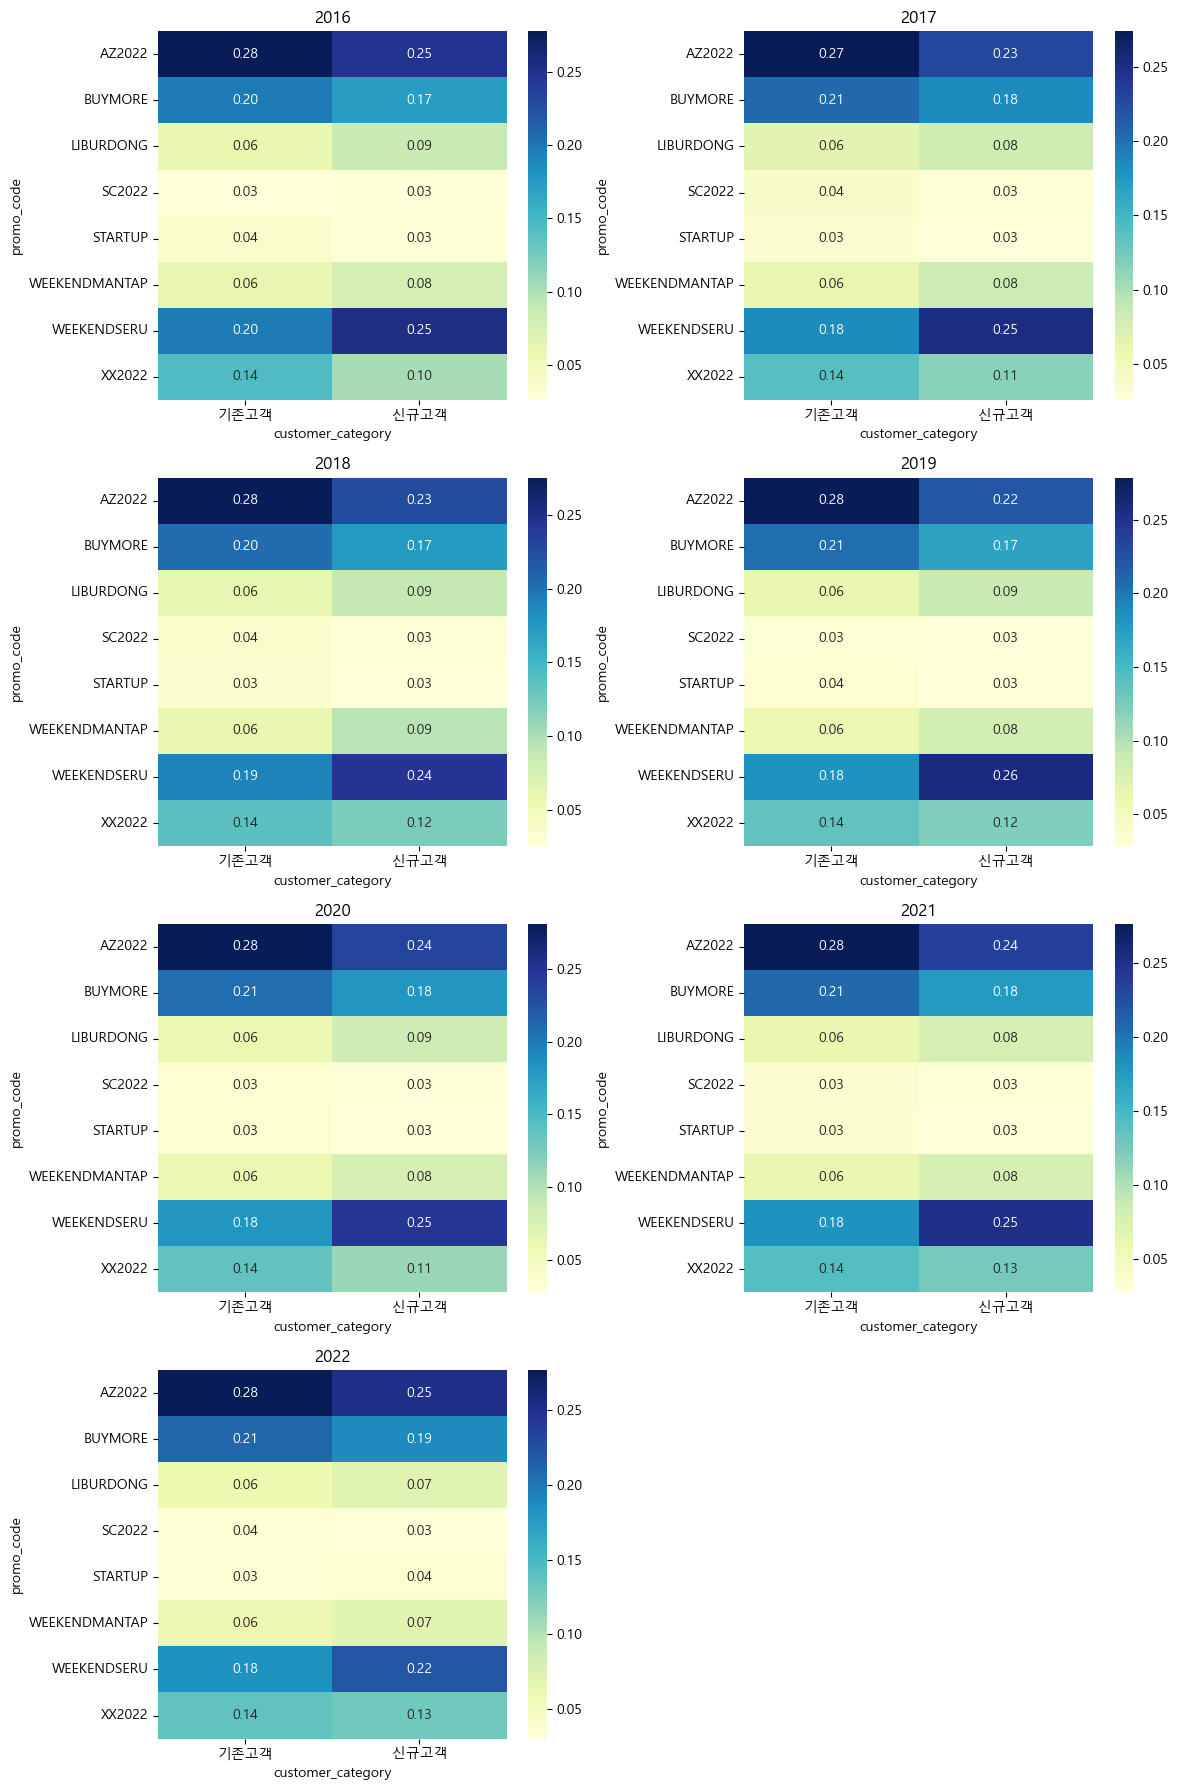

In [93]:
except_notpromo = df[~df['promo_code'].isin(['Not Promoted'])]
# Adjusting the code for yearly visualization using 4x2 subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 18))  # 4x2 subplot for 7 years and 1 empty subplot
years = range(2016, 2023)

for year, ax in zip(years, axes.ravel()):
    yearly_data = except_notpromo[except_notpromo['order_date'].dt.year == year]
    promo_counts_by_year = yearly_data.groupby(['customer_category', 'promo_code'])['session_id'].nunique().reset_index()
    total_counts_by_year = promo_counts_by_year.groupby('customer_category')['session_id'].sum()
    
    # Calculate the ratio
    promo_counts_by_year['cluster_ratio'] = promo_counts_by_year.groupby('customer_category')['session_id'].apply(lambda x: x / total_counts_by_year[x.name]).values

    # Convert data to pivot table format
    pivot_data_yearly = promo_counts_by_year.pivot(index='promo_code', columns='customer_category', values='cluster_ratio')

    # Plot heatmap
    sns.heatmap(data=pivot_data_yearly, annot=True, fmt=".2f", cmap='YlGnBu', ax=ax)
    ax.set_title(f'{year}')

# Hide the last subplot which is empty
axes[3, 1].axis('off')

plt.tight_layout()
plt.show()

- 고객별 주문 행동 분석:
    - total_order_num: 고객별 총 주문 횟수를 통해 어떤 고객이 가장 많이 주문하는지, 가장 적게 주문하는지 확인할 수 있습니다. 이를 통해 VIP 고객이나 잠재적 이탈 고객을 식별할 수 있습니다.
    - total_order_diff: 고객별 평균 주문 간격을 통해 고객의 주문 주기나 재구매율을 파악할 수 있습니다. 재구매율이 낮은 고객 세그먼트를 타겟팅하여 마케팅 전략을 수립할 수 있습니다.
    - average_price: 고객별 평균 구매 가격을 통해 고가의 제품을 선호하는 고객과 저가의 제품을 선호하는 고객을 구분할 수 있습니다.
- 고객 세그먼테이션:
    - 위의 세 가지 변수(total_order_num, total_order_diff, average_price)를 조합하여 K-means와 같은 클러스터링 알고리즘을 사용하여 고객을 여러 그룹으로 분류할 수 있습니다. 
    예를 들면, 높은 구매 빈도와 높은 평균 구매 가격을 가진 고객들을 'VIP 고객'으로 분류할 수 있습니다.
- 타겟팅 및 개인화 전략:
    - 분석 결과를 바탕으로 특정 세그먼트의 고객을 대상으로 한 타겟팅 전략을 수립할 수 있습니다. 
    예를 들어, 평균 구매 가격이 낮은 고객들을 대상으로 할인 쿠폰이나 프로모션을 제공하여 구매를 유도할 수 있습니다.
    또한, 개인화된 제품 추천이나 서비스를 제공하여 고객의 재구매를 유도할 수 있습니다.
- LTV(Lifetime Value) 계산:
    - 위의 변수들과 다른 고객 정보를 함께 사용하여 각 고객의 생애 가치를 추정할 수 있습니다.
- 고객 이탈 예측:
    - 고객별 주문 간격, 주문 횟수, 평균 구매 가격 등의 변수를 사용하여 고객의 이탈 가능성을 예측하는 모델을 구축할 수 있습니다.

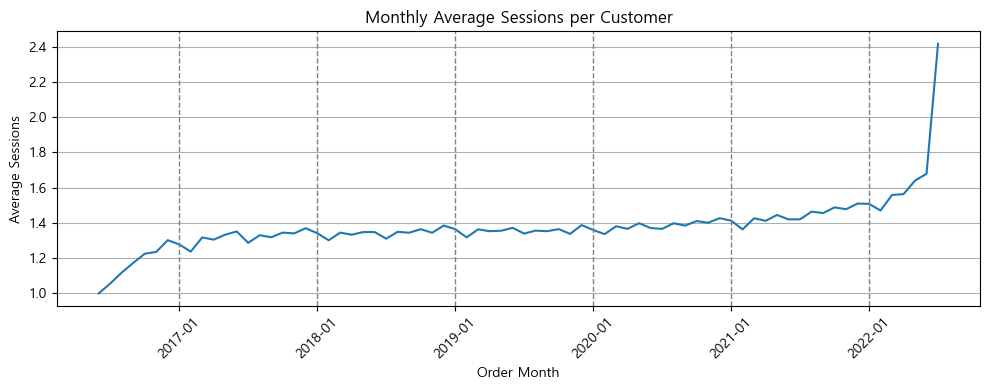

In [45]:
monthly_session_per_customer = df.groupby(['order_month', 'customer_id'])['session_id'].nunique().reset_index()
customers_per_month = monthly_session_per_customer.groupby('order_month')['customer_id'].nunique()
avg_session_per_month = monthly_session_per_customer.groupby('order_month')['session_id'].sum() / customers_per_month

plt.figure(figsize=(10, 4))
ax=avg_session_per_month.plot()

january_ticks = []
for idx, month in enumerate(month_list):
    if month.endswith('-01'):
        ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)
        january_ticks.append(idx)

ax.set_xticks(january_ticks)
ax.set_xticklabels([month_list[i] for i in january_ticks], rotation=45)
plt.title('Monthly Average Sessions per Customer')
plt.xlabel('Order Month')
plt.ylabel('Average Sessions')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

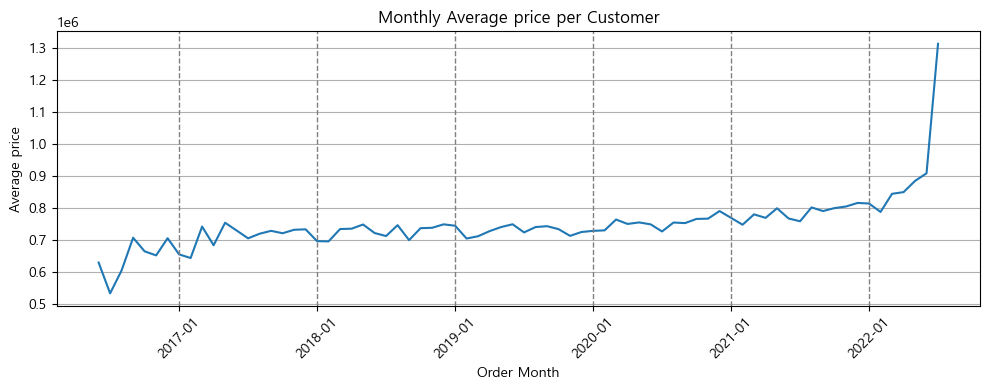

In [46]:
price_total_customer = df.groupby('order_month')['price'].sum()
avg_price_per_month = price_total_customer / customers_per_month

plt.figure(figsize=(10, 4))
ax=avg_price_per_month.plot()

january_ticks = []
for idx, month in enumerate(month_list):
    if month.endswith('-01'):
        ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)
        january_ticks.append(idx)

ax.set_xticks(january_ticks)
ax.set_xticklabels([month_list[i] for i in january_ticks], rotation=45)
plt.title('Monthly Average price per Customer')
plt.xlabel('Order Month')
plt.ylabel('Average price')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

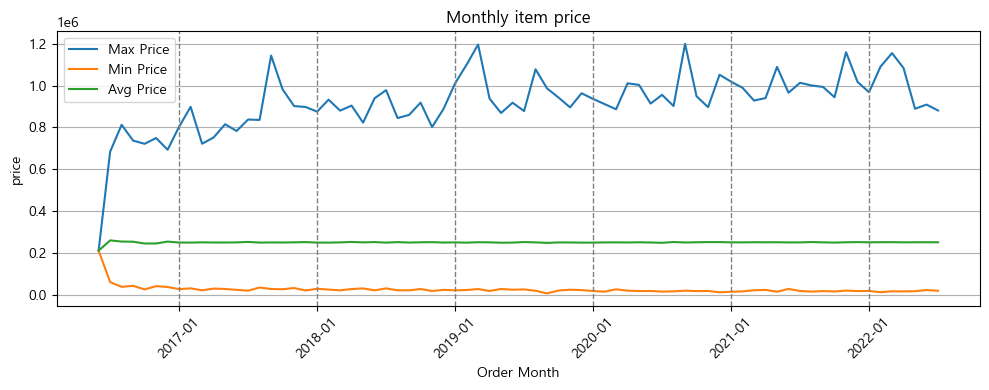

In [47]:
max_price = df.groupby('order_month')['item_price'].max()
min_price = df.groupby('order_month')['item_price'].min()
avg_price = df.groupby('order_month')['item_price'].mean()

plt.figure(figsize=(10, 4))
ax = max_price.plot(label="Max Price")
min_price.plot(ax=ax, label="Min Price") 
avg_price.plot(ax=ax, label="Avg Price") 

january_ticks = []
for idx, month in enumerate(month_list):
    if month.endswith('-01'):
        ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)
        january_ticks.append(idx)

ax.set_xticks(january_ticks)
ax.set_xticklabels([month_list[i] for i in january_ticks], rotation=45)
plt.title('Monthly item price')
plt.xlabel('Order Month')
plt.ylabel('price')
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()


- 전체의 datediff median 약 63일 
    - 60-65일의 datediff인 사람들의 구매 특성

In [48]:
selected_customers = avg_periods[(avg_periods >= 60) & (avg_periods <= 65)].index
datediff_63 = df[df['customer_id'].isin(selected_customers)]
datediff_63['customer_id'].nunique()

1041

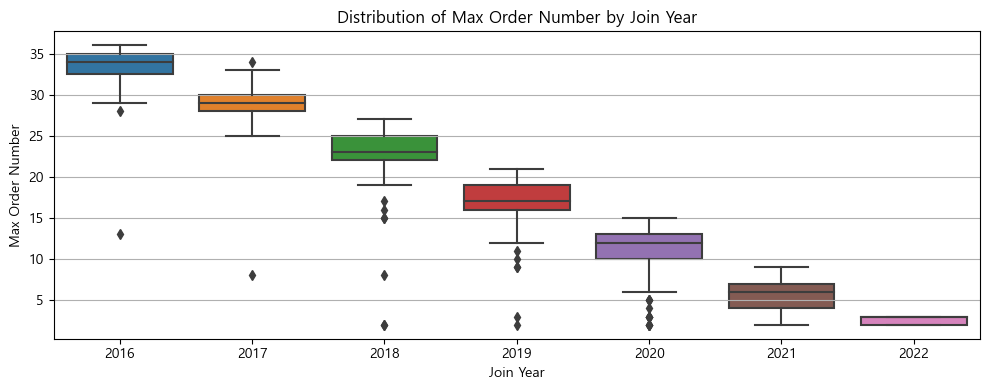

In [49]:
max_order_num = datediff_63.groupby(['join_year', 'customer_id'])['order_num'].max().reset_index()

plt.figure(figsize=(10, 4))
sns.boxplot(data=max_order_num, x='join_year', y='order_num')

plt.title('Distribution of Max Order Number by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Max Order Number')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

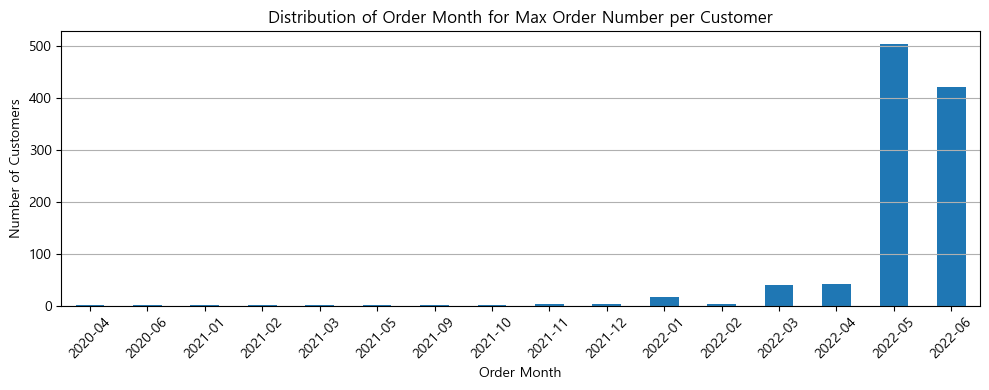

In [50]:
max_order63 = datediff_63.groupby('customer_id')['order_num'].idxmax()
max_order_month63 = datediff_63.loc[max_order63]['order_month']

plt.figure(figsize=(10, 4))
max_order_month63.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Order Month for Max Order Number per Customer')
plt.xlabel('Order Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

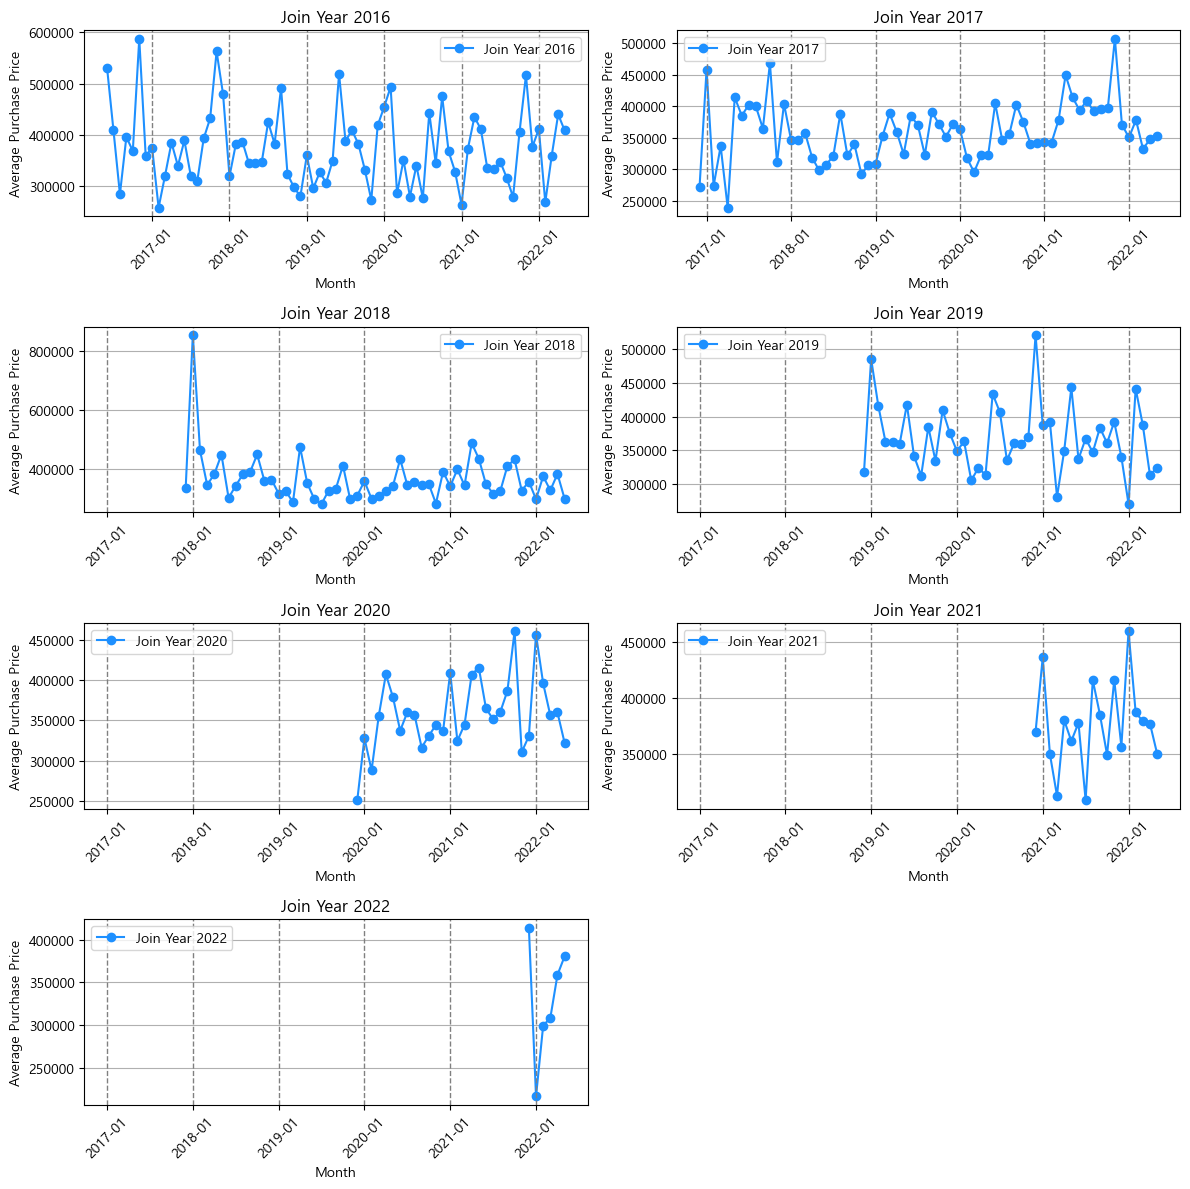

In [51]:
datediff_63_avgprice = datediff_63.groupby(['order_month','join_year'])['price'].mean().unstack()
nrows = int(np.ceil(len(datediff_63_avgprice.columns) / 2))

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 3 * nrows))
axes = axes.ravel()  
for ax, year in zip(axes, datediff_63_avgprice.columns):
    datediff_63_avgprice[year].plot(ax=ax, marker='o', color='dodgerblue', label=f'Join Year {year}')
    
    january_ticks = []
    january_labels = []
    for idx, month in enumerate(month_list):
        if month.endswith('-01'):
            ax.axvline(x=idx, color='gray', linestyle='--', linewidth=1)
            january_ticks.append(idx)
            january_labels.append(month)
    
    ax.set_xticks(january_ticks)
    ax.set_xticklabels(january_labels, rotation=45)
    ax.set_title(f"Join Year {year}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Average Purchase Price")
    ax.grid(True, axis='y')
    ax.legend()

if len(datediff_63_avgprice.columns) % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

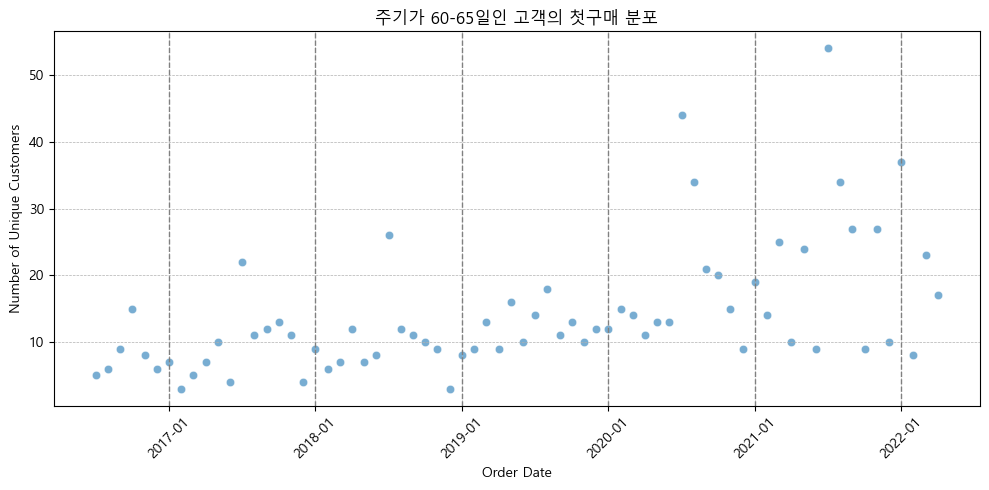

In [52]:
order_num_1_df = datediff_63[datediff_63['order_num'] == 1]
unique_customer_counts = order_num_1_df.groupby('order_month')['customer_id'].nunique()

plt.figure(figsize=(10, 5))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.scatter(unique_customer_counts.index, unique_customer_counts.values, alpha=0.6, edgecolors="w", linewidth=0.5)

for month in month_list:
    if month.endswith('-01'):
        plt.axvline(x=month, color='gray', linestyle='--', linewidth=1)

january_months = [month for month in month_list if month.endswith('-01')]
plt.xticks(january_months, rotation=45)
plt.title("주기가 60-65일인 고객의 첫구매 분포")
plt.xlabel("Order Date")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

- 2019년엔 무슨일이...? 가입자수도 적었으니 첫구매도 많지 않겠지만...
- 다른 년도는 6월에 첫구매가 많이 발생..

1회 이용고객 분포

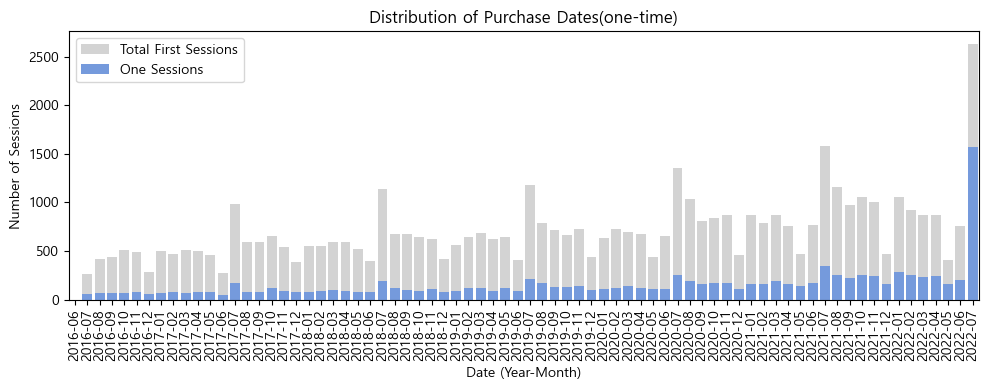

In [53]:
# 하루에 발생한 여러세션 모두 고려(고객수 != 거래수)
one_sessions_per_month = one_data.groupby('order_month')['session_id'].nunique().sort_index()
# 전체 고객의 첫거래수 분포 
first_purchase_dates = df[df.groupby('customer_id')['order_date'].transform('min') == df['order_date']]
total_first_sessions_per_month = first_purchase_dates.groupby('order_month')['session_id'].nunique().sort_index()

# 누락된 월에 대해서는 0의 값을 가지도록 데이터를 보완
one_sessions_per_month = one_sessions_per_month.reindex(month_list, fill_value=0)
total_first_sessions_per_month = total_first_sessions_per_month.reindex(month_list, fill_value=0)

plt.figure(figsize=(10,4))

sns.barplot(x=month_list, y=total_first_sessions_per_month, color='lightgray', label='Total First Sessions')
sns.barplot(x=month_list, y=one_sessions_per_month, color='cornflowerblue', label='One Sessions')

plt.title("Distribution of Purchase Dates(one-time)")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

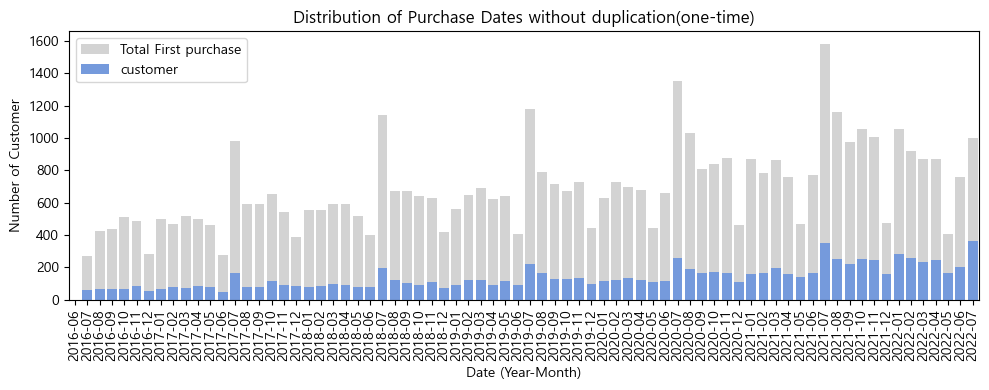

In [54]:
# 하루에 발생한 여러세션은 1번으로 고려(고객수 = 거래수)
one_customer_per_month = one_data.groupby('order_month')['customer_id'].nunique().sort_index()
# 전체 고객의 첫거래수 분포 
first_purchase_dates = df[df.groupby('customer_id')['order_date'].transform('min') == df['order_date']]
total_first_per_month = first_purchase_dates.groupby('order_month')['customer_id'].nunique().sort_index()
# 누락된 월에 대해서는 0의 값을 가지도록 데이터를 보완
one_customer_per_month = one_customer_per_month.reindex(month_list, fill_value=0)

plt.figure(figsize=(10,4))
sns.barplot(x=month_list, y=total_first_per_month, color='lightgray', label='Total First purchase')
sns.barplot(x=month_list, y=one_customer_per_month, color='cornflowerblue', label='customer')

plt.title("Distribution of Purchase Dates without duplication(one-time)")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Number of Customer")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

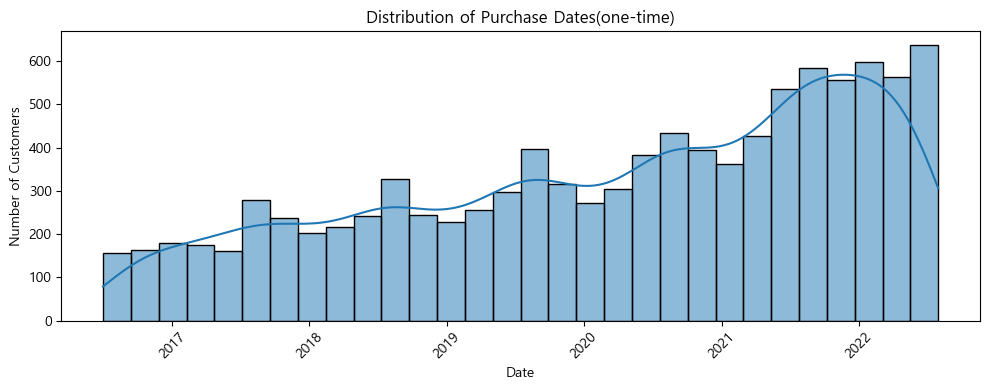

In [55]:
one_purchase_dates = one_data.groupby('customer_id')['order_date'].min()

plt.figure(figsize=(10,4))
sns.histplot(one_purchase_dates, bins=30, kde=True) 
plt.title("Distribution of Purchase Dates(one-time)")
plt.xlabel("Date")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [56]:
print(len(month_list))
print(len(total_first_sessions_per_month))
print(len(one_sessions_per_month))


74
74
74


1회 구매 -> 뭔가 대상을 군집화?해서 비교해야할..

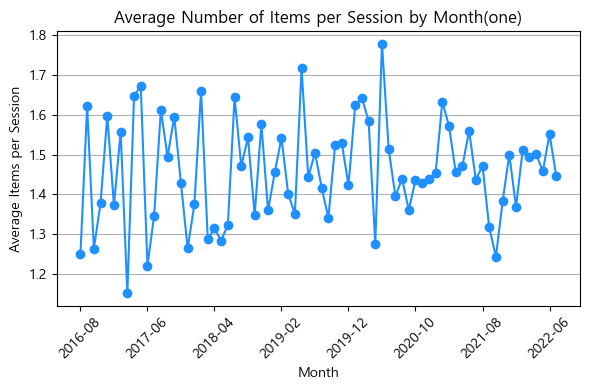

In [57]:
items_per_session = one_data.groupby(['order_month', 'session_id']).size()
average_items_per_session = items_per_session.groupby('order_month').mean()

plt.figure(figsize=(6, 4))
average_items_per_session[1:].plot(marker='o', color='dodgerblue')
plt.title('Average Number of Items per Session by Month(one)')
plt.ylabel('Average Items per Session')
plt.xlabel('Month')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

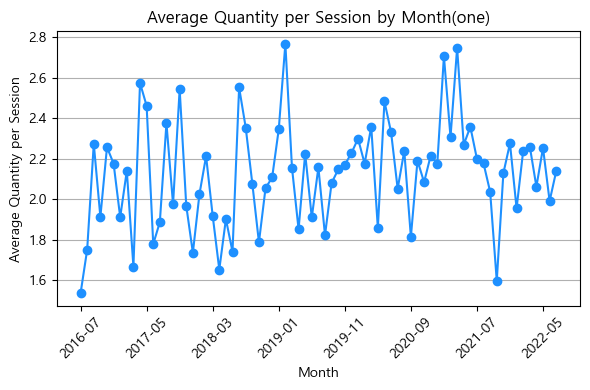

In [58]:
total_quantity_per_session = one_data.groupby(['order_month', 'session_id'])['quantity'].sum()
average_quantity_per_session = total_quantity_per_session.groupby('order_month').mean()

plt.figure(figsize=(6, 4))
average_quantity_per_session.plot(marker='o', color='dodgerblue')
plt.title('Average Quantity per Session by Month(one)')
plt.ylabel('Average Quantity per Session')
plt.xlabel('Month')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 다회 이용고객 분포 

In [59]:
multiple_data.shape

(1184497, 24)

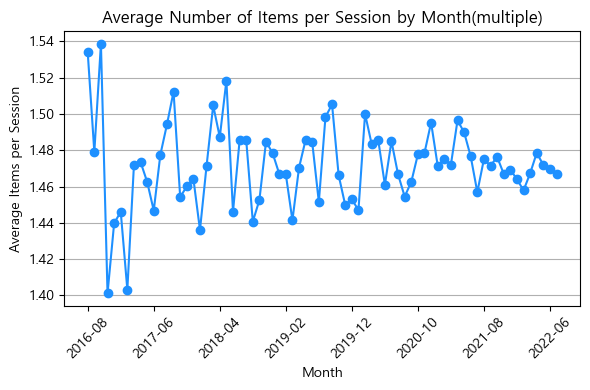

In [60]:
mulitems_per_session = multiple_data.groupby(['order_month', 'session_id']).size()
mulaverage_items_per_session = mulitems_per_session.groupby('order_month').mean()

plt.figure(figsize=(6, 4))
mulaverage_items_per_session[2:].plot(marker='o', color='dodgerblue')
plt.title('Average Number of Items per Session by Month(multiple)')
plt.ylabel('Average Items per Session')
plt.xlabel('Month')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

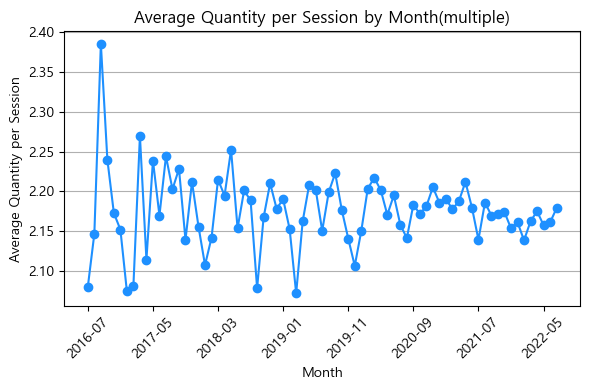

In [61]:
total_quantity_per_session = multiple_data.groupby(['order_month', 'session_id'])['quantity'].sum()
average_quantity_per_session = total_quantity_per_session.groupby('order_month').mean()

plt.figure(figsize=(6, 4))
average_quantity_per_session[1:].plot(marker='o', color='dodgerblue')
plt.title('Average Quantity per Session by Month(multiple)')
plt.ylabel('Average Quantity per Session')
plt.xlabel('Month')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

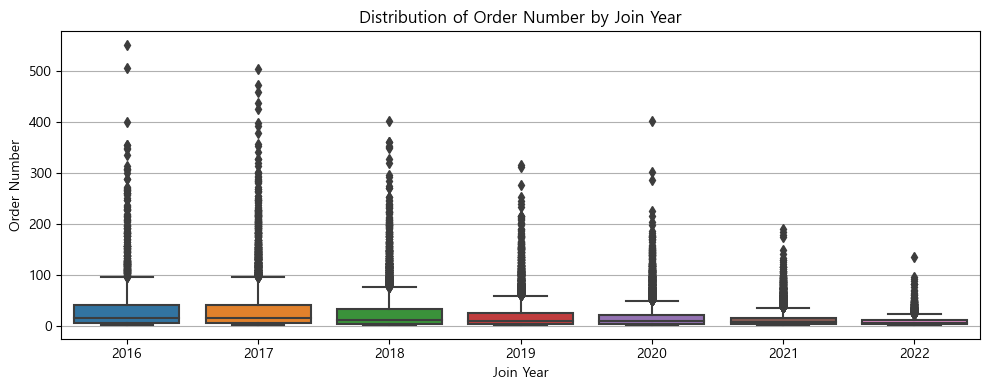

In [62]:
multipleorder_num = multiple_data.groupby(['join_year', 'customer_id'])['order_num'].max().reset_index()

plt.figure(figsize=(10, 4))
sns.boxplot(data=multipleorder_num, x='join_year', y='order_num')

plt.title('Distribution of Order Number by Join Year')
plt.xlabel('Join Year')
plt.ylabel('Order Number')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

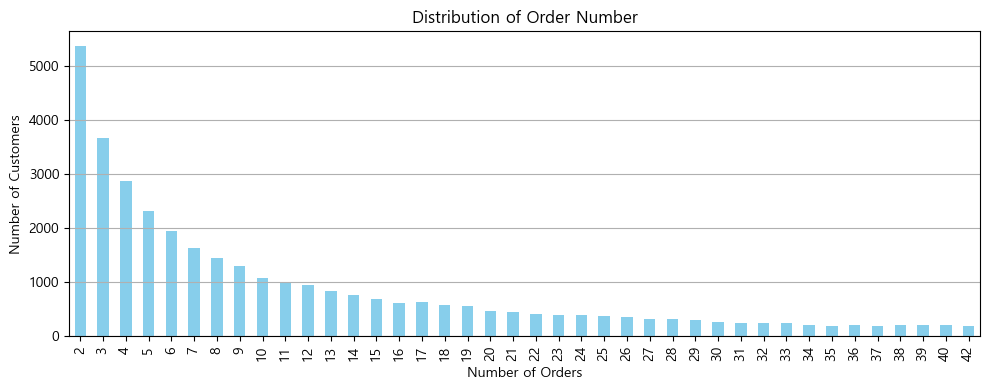

In [63]:
# order_num의 최대값에 대한 분포 계산
order_distribution = multipleorder_num['order_num'].value_counts().sort_values(ascending=False).head(40)

plt.figure(figsize=(10, 4))
order_distribution.sort_index().plot(kind='bar', color='skyblue')

plt.title('Distribution of Order Number')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

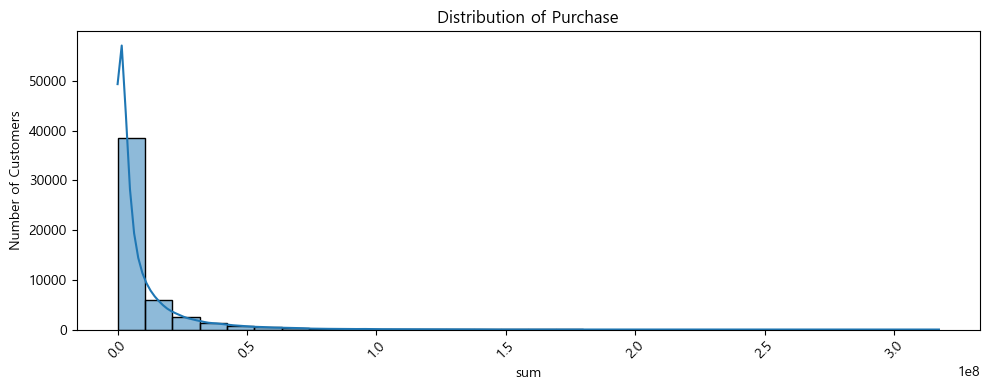

In [64]:
from matplotlib.ticker import ScalarFormatter

qp_sum=df.groupby('customer_id')['price'].sum()
plt.figure(figsize=(10,4))
sns.histplot(qp_sum, bins=30, kde=True) 
plt.title("Distribution of Purchase")
plt.xlabel("sum")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='x')

plt.show()

주기*빈도 = 거래기간

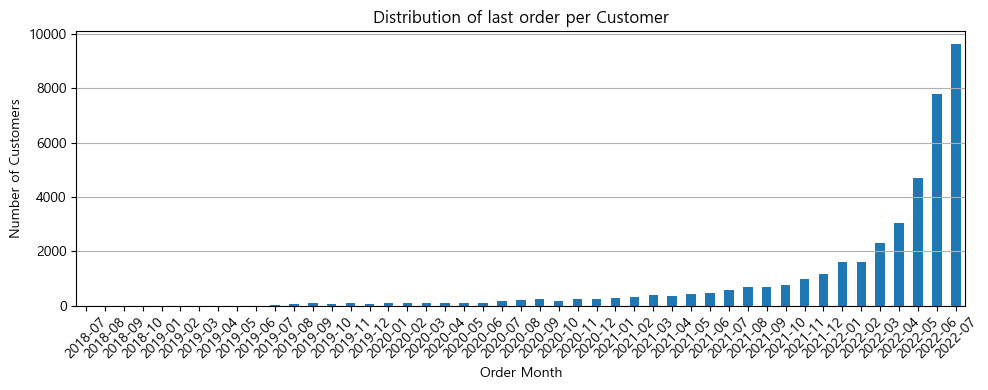

In [65]:
max_order = multiple_data.groupby('customer_id')['order_num'].idxmax()
max_order_month = multiple_data.loc[max_order]['order_month']

plt.figure(figsize=(10, 4))
max_order_month.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of last order per Customer')
plt.xlabel('Order Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

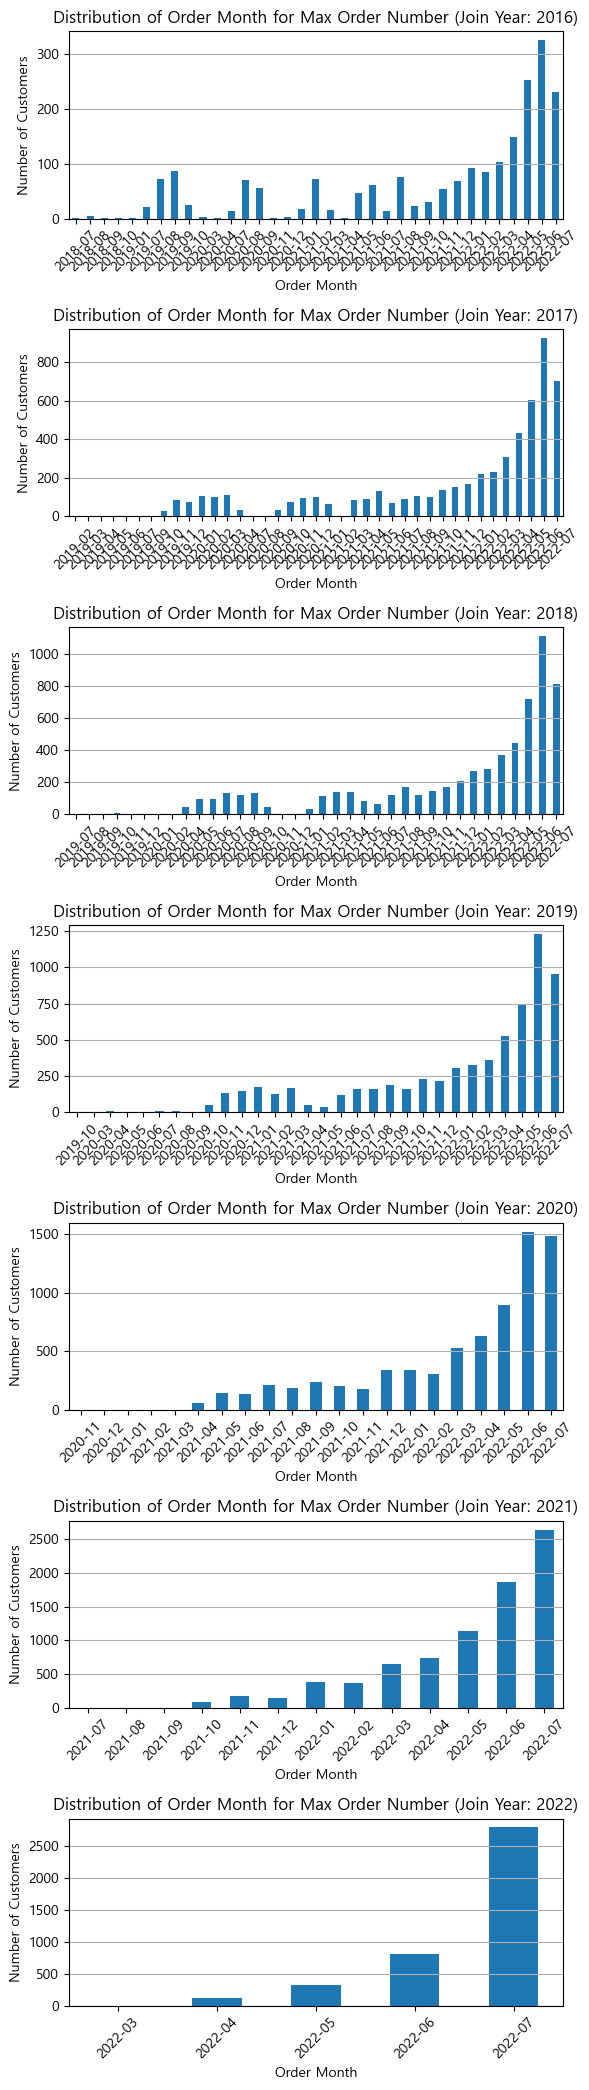

In [66]:
max_order_year = multiple_data.groupby(['join_year', 'customer_id'])['order_num'].idxmax()
max_order_month_year = multiple_data.loc[max_order][['order_month', 'join_year']]

unique_years = sorted(max_order_month_year['join_year'].unique())
fig, axes = plt.subplots(nrows=len(unique_years), figsize=(6, 3*len(unique_years)))

for ax, year in zip(axes, unique_years):
    max_order_month_year[max_order_month_year['join_year'] == year]['order_month'].value_counts().sort_index().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribution of Order Month for Max Order Number (Join Year: {year})')
    ax.set_xlabel('Order Month')
    ax.set_ylabel('Number of Customers')
    ax.grid(True, axis='y')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show() 

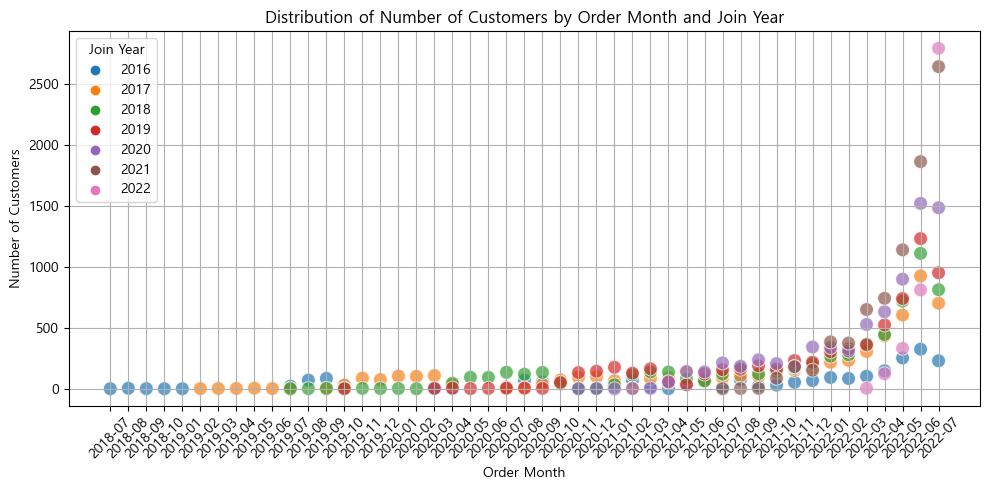

In [67]:
customer_counts = max_order_month_year.groupby(['order_month', 'join_year']).size().reset_index(name='customer_count')

plt.figure(figsize=(10, 5))

sns.scatterplot(x='order_month', y='customer_count', hue='join_year', data=customer_counts, s=100, palette='tab10', alpha=0.7)

plt.title('Distribution of Number of Customers by Order Month and Join Year')
plt.xlabel('Order Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='both')
plt.tight_layout()
plt.legend(title='Join Year', loc='upper left')
plt.show()

In [68]:
multiple_data['order_num'].max()

550

In [69]:
multiple_data[multiple_data['order_num']==550]

,created_at,order_date,order_time,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,...,price,product_id,birthdate,first_join_date,order_month,order_year,join_year,order_num,date_diff,customer_category
663491,2022-07-30 10:15:10.459435+00:00,2022-07-30,10:15:10,43202,347ed0a9-8357-4e08-b255-74b0d8ac7f53,Credit Card,Success,0,Not Promoted,10000,...,261580,51038,1999-11-16,2016-07-24,2022-07,2022,2016,550,4.0,기존고객
663492,2022-07-30 10:15:10.459435+00:00,2022-07-30,10:15:10,43202,347ed0a9-8357-4e08-b255-74b0d8ac7f53,Credit Card,Success,0,Not Promoted,10000,...,450478,45359,1999-11-16,2016-07-24,2022-07,2022,2016,550,4.0,기존고객
663493,2022-07-30 10:15:10.459435+00:00,2022-07-30,10:15:10,43202,347ed0a9-8357-4e08-b255-74b0d8ac7f53,Credit Card,Success,0,Not Promoted,10000,...,1384212,8828,1999-11-16,2016-07-24,2022-07,2022,2016,550,4.0,기존고객


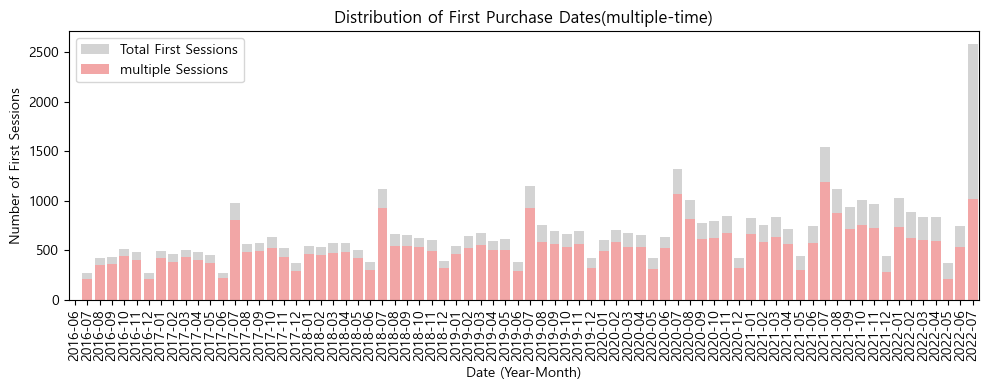

In [70]:
# 'multiple_data'에서 'order_num'이 1인 경우만 고려하여 월별 session_id의 유니크한 개수를 계산합니다.
multiple_First_sessions_per_month = multiple_data[multiple_data['order_num'] == 1].groupby('order_month')['session_id'].nunique().sort_index()

# 'df'에서 'order_num'이 1인 경우만 고려하여 월별 session_id의 유니크한 개수를 계산합니다.
total_first_sessions_per_month = df[df['order_num'] == 1].groupby('order_month')['session_id'].nunique().sort_index()

# 누락된 월에 대해서는 0의 값을 가지도록 데이터를 보완
multiple_First_sessions_per_month = multiple_First_sessions_per_month.reindex(month_list, fill_value=0)
total_first_sessions_per_month = total_first_sessions_per_month.reindex(month_list, fill_value=0)

plt.figure(figsize=(10,4))

sns.barplot(x=month_list, y=total_first_sessions_per_month, color='lightgray', label='Total First Sessions')
sns.barplot(x=month_list, y=multiple_First_sessions_per_month, color='#ff9999', label='multiple Sessions')

plt.title("Distribution of First Purchase Dates(multiple-time)")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Number of First Sessions")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

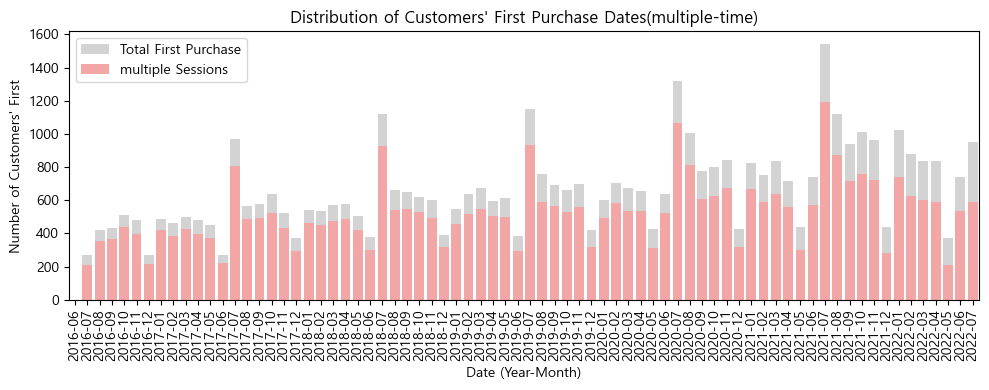

In [71]:
# 'multiple_data'에서 'order_num'이 1인 경우만 고려하여 월별 customer_id 유니크한 개수를 계산합니다.
multiple_First_customers_per_month = multiple_data[multiple_data['order_num'] == 1].groupby('order_month')['customer_id'].nunique().sort_index()

# 'df'에서 'order_num'이 1인 경우만 고려하여 월별 customer_id 유니크한 개수를 계산합니다.
total_first_sessions_per_month = df[df['order_num'] == 1].groupby('order_month')['customer_id'].nunique().sort_index()

# 누락된 월에 대해서는 0의 값을 가지도록 데이터를 보완
multiple_First_customers_per_month = multiple_First_customers_per_month.reindex(month_list, fill_value=0)
total_first_sessions_per_month = total_first_sessions_per_month.reindex(month_list, fill_value=0)

plt.figure(figsize=(10,4))

sns.barplot(x=month_list, y=total_first_sessions_per_month, color='lightgray', label='Total First Purchase')
sns.barplot(x=month_list, y=multiple_First_customers_per_month, color='#ff9999', label='multiple Sessions')

plt.title("Distribution of Customers' First Purchase Dates(multiple-time)")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Number of Customers' First")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

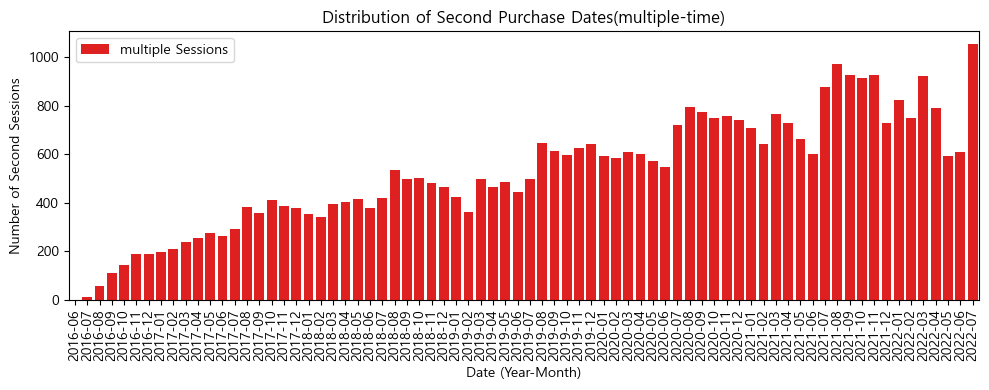

In [72]:
# second purchase
multiple_second_sessions_per_month = multiple_data[multiple_data['order_num'] == 2].groupby('order_month')['session_id'].nunique().sort_index()
multiple_second_sessions_per_month = multiple_second_sessions_per_month.reindex(month_list, fill_value=0)

plt.figure(figsize=(10,4))
sns.barplot(x=month_list, y=multiple_second_sessions_per_month, color='Red', label='multiple Sessions')

plt.title("Distribution of Second Purchase Dates(multiple-time)")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Number of Second Sessions")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

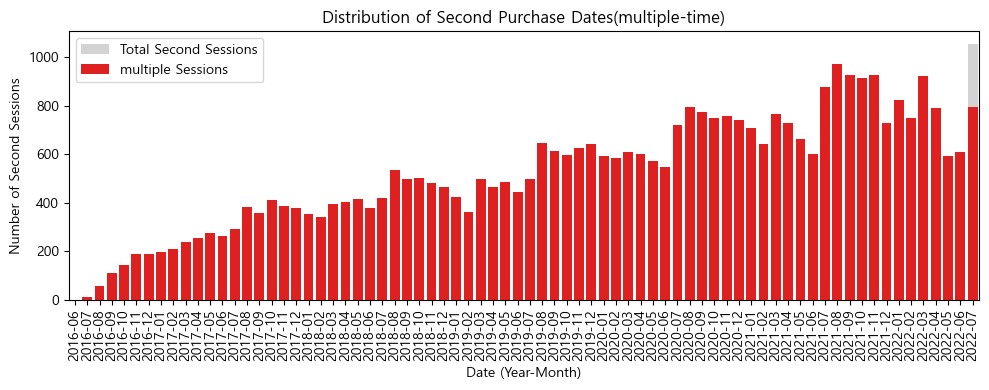

In [73]:
multiple_second_sessions_per_month = multiple_data[multiple_data['order_num'] == 2].groupby('order_month')['customer_id'].nunique().sort_index()
total_second_sessions_per_month = df[df['order_num'] == 2].groupby('order_month')['session_id'].nunique().sort_index()

# 누락된 월에 대해서는 0의 값을 가지도록 데이터를 보완
multiple_second_sessions_per_month = multiple_second_sessions_per_month.reindex(month_list, fill_value=0)
total_second_sessions_per_month = total_second_sessions_per_month.reindex(month_list, fill_value=0)

# 그래프를 그립니다.
plt.figure(figsize=(10,4))

sns.barplot(x=month_list, y=total_second_sessions_per_month, color='lightgray', label='Total Second Sessions')
sns.barplot(x=month_list, y=multiple_second_sessions_per_month, color='Red', label='multiple Sessions')

plt.title("Distribution of Second Purchase Dates(multiple-time)")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Number of Second Sessions")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

plt.show()

In [74]:
df['first_join_date'] = pd.to_datetime(df['first_join_date'])
df['birthdate'] = pd.to_datetime(df['birthdate'])

In [75]:
# # 7월 이후와 이전인 사람 구분
# july_data['join_group'] = np.where(july_data['first_join_date'] >= '2022-07', 'After July', 'Before July')

# session_counts = july_data.groupby(['order_date', 'customer_id', 'join_group','birthdate','order_num'])['session_id'].nunique()
# multiple_sessions_dates = session_counts[session_counts > 1]

# print(multiple_sessions_dates)

In [76]:
# 같은 order_date와 customer_id 기준으로 그룹화하고, promo_amount가 0인 경우와 아닌 경우로 구분
promo_usage = one_data.groupby(['order_date', 'customer_id'])['promo_amount'].max().reset_index()
promo_usage['used_promo'] = promo_usage['promo_amount'] > 0

# promo_amount가 0인 경우와 0이 아닌 경우로 나눠서 비율 계산
promo_counts = promo_usage['used_promo'].value_counts()
promo_usage_rate = promo_counts / promo_counts.sum() * 100

print(promo_usage_rate)

def calculate_promo_usage_rate(data):
    # 같은 order_date와 customer_id 기준으로 그룹화하고, promo_amount가 0인 경우와 아닌 경우로 구분
    promo_usage = data.groupby(['order_date', 'customer_id'])['promo_amount'].max().reset_index()
    promo_usage['used_promo'] = promo_usage['promo_amount'] > 0

    # promo_amount가 0인 경우와 0이 아닌 경우로 나눠서 비율 계산
    promo_counts = promo_usage['used_promo'].value_counts()
    promo_usage_rate = promo_counts / promo_counts.sum() * 100

    return promo_usage_rate

# order_num이 1일 때
order1_data = multiple_data[multiple_data['order_num'] == 1]
order1_promo_usage_rate = calculate_promo_usage_rate(order1_data)

# order_num이 2일 때
order2_data = multiple_data[multiple_data['order_num'] == 2]
order2_promo_usage_rate = calculate_promo_usage_rate(order2_data)

print("\nOrder 1 Promo Usage Rate:")
print(order1_promo_usage_rate)
print("\nOrder 2 Promo Usage Rate:")
print(order2_promo_usage_rate)


used_promo
False    64.051707
True     35.948293
Name: count, dtype: float64

Order 1 Promo Usage Rate:
used_promo
False    63.966619
True     36.033381
Name: count, dtype: float64

Order 2 Promo Usage Rate:
used_promo
False    63.631414
True     36.368586
Name: count, dtype: float64


In [77]:
df_grouped = df.groupby(['order_date', 'customer_id', 'session_id']).size().reset_index(name='counts')
sorted_df = df_grouped.sort_values(by='counts', ascending=False)
sorted_df

,order_date,customer_id,session_id,counts
177511,2019-09-03,74964,eaeb79af-fbe8-4825-8457-c73f5937ef96,51
439081,2021-04-05,33731,5f3094ac-b3e4-4dc1-b1a2-bd492634abea,49
21553,2017-08-25,20789,2744464b-1097-4bb5-89e2-275aba30d3ea,48
440264,2021-04-07,28080,63687c42-bbbc-443a-be21-2e15e0e8c7a9,48
803159,2022-07-14,66915,5aa4bcd3-d4a7-400f-a11f-5cf38b751fe4,43
...,...,...,...,...
297603,2020-07-13,6527,8e819397-4fa3-4abd-95ea-ba01f68f3179,1
297604,2020-07-13,6585,1305f64a-8222-4e2b-b260-17a6e59cb6d2,1
297605,2020-07-13,6623,a17ccdca-9dcb-43d0-bfb0-57b983cbd7d1,1
297606,2020-07-13,6926,10bb3b1c-0a8a-457e-bcfa-c96f7435e96b,1


In [78]:
result = df.groupby(['order_date', 'customer_id'])['session_id'].nunique().reset_index(name='unique_sessions')
sorted_result = result.sort_values(by='unique_sessions', ascending=False)
filtered_result = sorted_result[sorted_result['order_date'] < '2022-07-01']

print(filtered_result)

       order_date  customer_id  unique_sessions
542666 2021-09-10        67350                1
542665 2021-09-10        67163                1
542668 2021-09-10        67566                1
542664 2021-09-10        66845                1
542662 2021-09-10        66359                1
...           ...          ...              ...
271360 2020-05-12        85701                1
271361 2020-05-12        85751                1
271362 2020-05-12        85981                1
271363 2020-05-12        85999                1
271364 2020-05-12        87102                1

[791874 rows x 3 columns]
